### Prediction of previously used data

We begin by studying the data used by Sanchez-Gonzalez _et al._ and making our own predictions on it. Let's first get the delay between the two pulses and all inputs as features (and also process them):

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if "oldMode2017" in os.getcwd():
    os.chdir("..")

In [2]:
import time, yaml
import logging.config

stream = open("log_config.yml", "r")
conf = yaml.safe_load(stream)
conf["logfile"] = "logs/oldMode2017_%s.log" % str(time.time())
logging.config.dictConfig(conf)

In [3]:
from oldMode2017.setup import get_data

data = get_data()  # get data first of all

Filtering output columns...
2 columns left.
Filtering events...
38825 events left.
Filtering MAD & Energy...
32435 events left.
Filtering input columns...
101 columns left.
Done.


/home/karim/PycharmProjects/XFEL-ML/utility/split_prep_util.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ref = ref.append(data_mean)
/home/karim/PycharmProjects/XFEL-ML/utility/split_prep_util.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ref = ref.append(data_std)
/home/karim/PycharmProjects/XFEL-ML/utility/split_prep_util.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ref = ref.append(data_mean)
/home/karim/PycharmProjects/XFEL-ML/utility/split_prep_util.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ref = ref.append(data_std)
/home/karim/PycharmProjects/XFEL-ML/utility/split_prep_util.py:47: FutureWarning: 

In [ ]:
#### Use an ANN

We begin by simply fitting an ANN to the data. Using hyperparametrization before, we found the ideal parameters:

* 2 hidden layers of 20 nodes each
* ReLU activation function
* no drop out or batch normalization
* l2 regularization

Fitting the ann with these parameters across 5,000 epochs:

In [4]:
from utility.pipelines.ann import *

2022-03-07 13:11:56.241502: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 13:11:56.241551: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Starting ann training...
Epoch 1/5000
24/24 - 0s - loss: 1.4069 - mae: 0.8781 - val_loss: 1.3806 - val_mae: 0.8530
Epoch 2/5000
24/24 - 0s - loss: 1.3733 - mae: 0.8466 - val_loss: 1.3519 - val_mae: 0.8262
Epoch 3/5000
24/24 - 0s - loss: 1.3481 - mae: 0.8233 - val_loss: 1.3287 - val_mae: 0.8049
Epoch 4/5000
24/24 - 0s - loss: 1.3272 - mae: 0.8042 - val_loss: 1.3092 - val_mae: 0.7871
Epoch 5/5000
24/24 - 0s - loss: 1.3093 - mae: 0.7880 - val_loss: 1.2924 - val_mae: 0.7720
Epoch 6/5000
24/24 - 0s - loss: 1.2936 - mae: 0.7739 - val_loss: 1.2775 - val_mae: 0.7587
Epoch 7/5000
24/24 - 0s - loss: 1.2796 - mae: 0.7615 - val_loss: 1.2640 - val_mae: 0.7467
Epoch 8/5000
24/24 - 0s - loss: 1.2668 - mae: 0.7503 - val_loss: 1.2516 - val_mae: 0.7359
Epoch 9/5000
24/24 - 0s - loss: 1.2549 - mae: 0.7399 - val_loss: 1.2401 - val_mae: 0.7259
Epoch 10/5000
24/24 - 0s - loss: 1.2439 - mae: 0.7304 - val_loss: 1.2294 - val_mae: 0.7167
Epoch 11/5000
24/24 - 0s - loss: 1.2336 - mae: 0.7216 - val_loss: 1.2193 -

Epoch 91/5000
24/24 - 0s - loss: 0.8671 - mae: 0.4403 - val_loss: 0.8667 - val_mae: 0.4404
Epoch 92/5000
24/24 - 0s - loss: 0.8645 - mae: 0.4386 - val_loss: 0.8642 - val_mae: 0.4388
Epoch 93/5000
24/24 - 0s - loss: 0.8620 - mae: 0.4370 - val_loss: 0.8618 - val_mae: 0.4372
Epoch 94/5000
24/24 - 0s - loss: 0.8595 - mae: 0.4353 - val_loss: 0.8593 - val_mae: 0.4356
Epoch 95/5000
24/24 - 0s - loss: 0.8570 - mae: 0.4337 - val_loss: 0.8569 - val_mae: 0.4340
Epoch 96/5000
24/24 - 0s - loss: 0.8546 - mae: 0.4321 - val_loss: 0.8545 - val_mae: 0.4325
Epoch 97/5000
24/24 - 0s - loss: 0.8522 - mae: 0.4305 - val_loss: 0.8522 - val_mae: 0.4309
Epoch 98/5000
24/24 - 0s - loss: 0.8497 - mae: 0.4289 - val_loss: 0.8498 - val_mae: 0.4294
Epoch 99/5000
24/24 - 0s - loss: 0.8474 - mae: 0.4273 - val_loss: 0.8475 - val_mae: 0.4279
Epoch 100/5000
24/24 - 0s - loss: 0.8450 - mae: 0.4258 - val_loss: 0.8452 - val_mae: 0.4265
Epoch 101/5000
24/24 - 0s - loss: 0.8427 - mae: 0.4243 - val_loss: 0.8430 - val_mae: 0.42

24/24 - 0s - loss: 0.7055 - mae: 0.3435 - val_loss: 0.7090 - val_mae: 0.3474
Epoch 181/5000
24/24 - 0s - loss: 0.7042 - mae: 0.3428 - val_loss: 0.7078 - val_mae: 0.3467
Epoch 182/5000
24/24 - 0s - loss: 0.7029 - mae: 0.3422 - val_loss: 0.7065 - val_mae: 0.3461
Epoch 183/5000
24/24 - 0s - loss: 0.7016 - mae: 0.3415 - val_loss: 0.7052 - val_mae: 0.3454
Epoch 184/5000
24/24 - 0s - loss: 0.7003 - mae: 0.3408 - val_loss: 0.7040 - val_mae: 0.3448
Epoch 185/5000
24/24 - 0s - loss: 0.6991 - mae: 0.3402 - val_loss: 0.7027 - val_mae: 0.3442
Epoch 186/5000
24/24 - 0s - loss: 0.6978 - mae: 0.3395 - val_loss: 0.7015 - val_mae: 0.3436
Epoch 187/5000
24/24 - 0s - loss: 0.6966 - mae: 0.3389 - val_loss: 0.7003 - val_mae: 0.3429
Epoch 188/5000
24/24 - 0s - loss: 0.6953 - mae: 0.3383 - val_loss: 0.6991 - val_mae: 0.3423
Epoch 189/5000
24/24 - 0s - loss: 0.6941 - mae: 0.3376 - val_loss: 0.6978 - val_mae: 0.3417
Epoch 190/5000
24/24 - 0s - loss: 0.6928 - mae: 0.3370 - val_loss: 0.6966 - val_mae: 0.3411
Epo

Epoch 270/5000
24/24 - 0s - loss: 0.6121 - mae: 0.2995 - val_loss: 0.6165 - val_mae: 0.3041
Epoch 271/5000
24/24 - 0s - loss: 0.6113 - mae: 0.2991 - val_loss: 0.6157 - val_mae: 0.3038
Epoch 272/5000
24/24 - 0s - loss: 0.6105 - mae: 0.2988 - val_loss: 0.6149 - val_mae: 0.3034
Epoch 273/5000
24/24 - 0s - loss: 0.6096 - mae: 0.2984 - val_loss: 0.6141 - val_mae: 0.3031
Epoch 274/5000
24/24 - 0s - loss: 0.6088 - mae: 0.2981 - val_loss: 0.6133 - val_mae: 0.3028
Epoch 275/5000
24/24 - 0s - loss: 0.6080 - mae: 0.2977 - val_loss: 0.6125 - val_mae: 0.3024
Epoch 276/5000
24/24 - 0s - loss: 0.6072 - mae: 0.2974 - val_loss: 0.6117 - val_mae: 0.3021
Epoch 277/5000
24/24 - 0s - loss: 0.6064 - mae: 0.2971 - val_loss: 0.6109 - val_mae: 0.3018
Epoch 278/5000
24/24 - 0s - loss: 0.6056 - mae: 0.2967 - val_loss: 0.6101 - val_mae: 0.3014
Epoch 279/5000
24/24 - 0s - loss: 0.6048 - mae: 0.2964 - val_loss: 0.6093 - val_mae: 0.3011
Epoch 280/5000
24/24 - 0s - loss: 0.6040 - mae: 0.2961 - val_loss: 0.6085 - val_

24/24 - 0s - loss: 0.5488 - mae: 0.2743 - val_loss: 0.5541 - val_mae: 0.2799
Epoch 360/5000
24/24 - 0s - loss: 0.5482 - mae: 0.2741 - val_loss: 0.5535 - val_mae: 0.2797
Epoch 361/5000
24/24 - 0s - loss: 0.5475 - mae: 0.2739 - val_loss: 0.5529 - val_mae: 0.2795
Epoch 362/5000
24/24 - 0s - loss: 0.5469 - mae: 0.2736 - val_loss: 0.5523 - val_mae: 0.2792
Epoch 363/5000
24/24 - 0s - loss: 0.5463 - mae: 0.2734 - val_loss: 0.5518 - val_mae: 0.2790
Epoch 364/5000
24/24 - 0s - loss: 0.5457 - mae: 0.2732 - val_loss: 0.5512 - val_mae: 0.2788
Epoch 365/5000
24/24 - 0s - loss: 0.5451 - mae: 0.2730 - val_loss: 0.5506 - val_mae: 0.2786
Epoch 366/5000
24/24 - 0s - loss: 0.5445 - mae: 0.2727 - val_loss: 0.5500 - val_mae: 0.2784
Epoch 367/5000
24/24 - 0s - loss: 0.5439 - mae: 0.2725 - val_loss: 0.5494 - val_mae: 0.2782
Epoch 368/5000
24/24 - 0s - loss: 0.5433 - mae: 0.2723 - val_loss: 0.5488 - val_mae: 0.2780
Epoch 369/5000
24/24 - 0s - loss: 0.5427 - mae: 0.2721 - val_loss: 0.5482 - val_mae: 0.2778
Epo

Epoch 449/5000
24/24 - 0s - loss: 0.5000 - mae: 0.2566 - val_loss: 0.5066 - val_mae: 0.2634
Epoch 450/5000
24/24 - 0s - loss: 0.4995 - mae: 0.2564 - val_loss: 0.5062 - val_mae: 0.2632
Epoch 451/5000
24/24 - 0s - loss: 0.4990 - mae: 0.2562 - val_loss: 0.5057 - val_mae: 0.2631
Epoch 452/5000
24/24 - 0s - loss: 0.4985 - mae: 0.2561 - val_loss: 0.5052 - val_mae: 0.2629
Epoch 453/5000
24/24 - 0s - loss: 0.4981 - mae: 0.2559 - val_loss: 0.5048 - val_mae: 0.2628
Epoch 454/5000
24/24 - 0s - loss: 0.4976 - mae: 0.2557 - val_loss: 0.5043 - val_mae: 0.2626
Epoch 455/5000
24/24 - 0s - loss: 0.4971 - mae: 0.2556 - val_loss: 0.5038 - val_mae: 0.2624
Epoch 456/5000
24/24 - 0s - loss: 0.4967 - mae: 0.2554 - val_loss: 0.5034 - val_mae: 0.2623
Epoch 457/5000
24/24 - 0s - loss: 0.4962 - mae: 0.2552 - val_loss: 0.5029 - val_mae: 0.2621
Epoch 458/5000
24/24 - 0s - loss: 0.4957 - mae: 0.2551 - val_loss: 0.5025 - val_mae: 0.2620
Epoch 459/5000
24/24 - 0s - loss: 0.4953 - mae: 0.2549 - val_loss: 0.5020 - val_

24/24 - 0s - loss: 0.4618 - mae: 0.2434 - val_loss: 0.4692 - val_mae: 0.2510
Epoch 539/5000
24/24 - 0s - loss: 0.4614 - mae: 0.2433 - val_loss: 0.4689 - val_mae: 0.2509
Epoch 540/5000
24/24 - 0s - loss: 0.4610 - mae: 0.2432 - val_loss: 0.4685 - val_mae: 0.2508
Epoch 541/5000
24/24 - 0s - loss: 0.4606 - mae: 0.2430 - val_loss: 0.4681 - val_mae: 0.2507
Epoch 542/5000
24/24 - 0s - loss: 0.4602 - mae: 0.2429 - val_loss: 0.4677 - val_mae: 0.2506
Epoch 543/5000
24/24 - 0s - loss: 0.4599 - mae: 0.2428 - val_loss: 0.4674 - val_mae: 0.2504
Epoch 544/5000
24/24 - 0s - loss: 0.4595 - mae: 0.2427 - val_loss: 0.4670 - val_mae: 0.2503
Epoch 545/5000
24/24 - 0s - loss: 0.4591 - mae: 0.2425 - val_loss: 0.4666 - val_mae: 0.2502
Epoch 546/5000
24/24 - 0s - loss: 0.4587 - mae: 0.2424 - val_loss: 0.4663 - val_mae: 0.2501
Epoch 547/5000
24/24 - 0s - loss: 0.4583 - mae: 0.2423 - val_loss: 0.4659 - val_mae: 0.2500
Epoch 548/5000
24/24 - 0s - loss: 0.4580 - mae: 0.2421 - val_loss: 0.4655 - val_mae: 0.2498
Epo

Epoch 628/5000
24/24 - 0s - loss: 0.4304 - mae: 0.2332 - val_loss: 0.4384 - val_mae: 0.2413
Epoch 629/5000
24/24 - 0s - loss: 0.4301 - mae: 0.2331 - val_loss: 0.4381 - val_mae: 0.2412
Epoch 630/5000
24/24 - 0s - loss: 0.4298 - mae: 0.2330 - val_loss: 0.4378 - val_mae: 0.2411
Epoch 631/5000
24/24 - 0s - loss: 0.4295 - mae: 0.2329 - val_loss: 0.4375 - val_mae: 0.2410
Epoch 632/5000
24/24 - 0s - loss: 0.4292 - mae: 0.2328 - val_loss: 0.4372 - val_mae: 0.2409
Epoch 633/5000
24/24 - 0s - loss: 0.4289 - mae: 0.2327 - val_loss: 0.4369 - val_mae: 0.2408
Epoch 634/5000
24/24 - 0s - loss: 0.4286 - mae: 0.2326 - val_loss: 0.4366 - val_mae: 0.2407
Epoch 635/5000
24/24 - 0s - loss: 0.4282 - mae: 0.2325 - val_loss: 0.4363 - val_mae: 0.2406
Epoch 636/5000
24/24 - 0s - loss: 0.4279 - mae: 0.2324 - val_loss: 0.4360 - val_mae: 0.2405
Epoch 637/5000
24/24 - 0s - loss: 0.4276 - mae: 0.2323 - val_loss: 0.4357 - val_mae: 0.2404
Epoch 638/5000
24/24 - 0s - loss: 0.4273 - mae: 0.2322 - val_loss: 0.4354 - val_

Epoch 718/5000
24/24 - 0s - loss: 0.4049 - mae: 0.2254 - val_loss: 0.4132 - val_mae: 0.2338
Epoch 719/5000
24/24 - 0s - loss: 0.4047 - mae: 0.2253 - val_loss: 0.4129 - val_mae: 0.2337
Epoch 720/5000
24/24 - 0s - loss: 0.4044 - mae: 0.2252 - val_loss: 0.4127 - val_mae: 0.2336
Epoch 721/5000
24/24 - 0s - loss: 0.4041 - mae: 0.2252 - val_loss: 0.4124 - val_mae: 0.2335
Epoch 722/5000
24/24 - 0s - loss: 0.4039 - mae: 0.2251 - val_loss: 0.4122 - val_mae: 0.2335
Epoch 723/5000
24/24 - 0s - loss: 0.4036 - mae: 0.2250 - val_loss: 0.4119 - val_mae: 0.2334
Epoch 724/5000
24/24 - 0s - loss: 0.4034 - mae: 0.2249 - val_loss: 0.4117 - val_mae: 0.2333
Epoch 725/5000
24/24 - 0s - loss: 0.4031 - mae: 0.2249 - val_loss: 0.4114 - val_mae: 0.2333
Epoch 726/5000
24/24 - 0s - loss: 0.4029 - mae: 0.2248 - val_loss: 0.4112 - val_mae: 0.2332
Epoch 727/5000
24/24 - 0s - loss: 0.4026 - mae: 0.2247 - val_loss: 0.4109 - val_mae: 0.2331
Epoch 728/5000
24/24 - 0s - loss: 0.4024 - mae: 0.2246 - val_loss: 0.4107 - val_

24/24 - 0s - loss: 0.3840 - mae: 0.2195 - val_loss: 0.3925 - val_mae: 0.2280
Epoch 808/5000
24/24 - 0s - loss: 0.3838 - mae: 0.2194 - val_loss: 0.3923 - val_mae: 0.2280
Epoch 809/5000
24/24 - 0s - loss: 0.3836 - mae: 0.2194 - val_loss: 0.3921 - val_mae: 0.2279
Epoch 810/5000
24/24 - 0s - loss: 0.3834 - mae: 0.2193 - val_loss: 0.3919 - val_mae: 0.2278
Epoch 811/5000
24/24 - 0s - loss: 0.3832 - mae: 0.2192 - val_loss: 0.3916 - val_mae: 0.2278
Epoch 812/5000
24/24 - 0s - loss: 0.3830 - mae: 0.2192 - val_loss: 0.3914 - val_mae: 0.2277
Epoch 813/5000
24/24 - 0s - loss: 0.3828 - mae: 0.2191 - val_loss: 0.3912 - val_mae: 0.2277
Epoch 814/5000
24/24 - 0s - loss: 0.3825 - mae: 0.2191 - val_loss: 0.3910 - val_mae: 0.2276
Epoch 815/5000
24/24 - 0s - loss: 0.3823 - mae: 0.2190 - val_loss: 0.3908 - val_mae: 0.2276
Epoch 816/5000
24/24 - 0s - loss: 0.3821 - mae: 0.2189 - val_loss: 0.3906 - val_mae: 0.2275
Epoch 817/5000
24/24 - 0s - loss: 0.3819 - mae: 0.2189 - val_loss: 0.3904 - val_mae: 0.2275
Epo

Epoch 897/5000
24/24 - 0s - loss: 0.3663 - mae: 0.2148 - val_loss: 0.3748 - val_mae: 0.2233
Epoch 898/5000
24/24 - 0s - loss: 0.3662 - mae: 0.2147 - val_loss: 0.3746 - val_mae: 0.2233
Epoch 899/5000
24/24 - 0s - loss: 0.3660 - mae: 0.2147 - val_loss: 0.3744 - val_mae: 0.2232
Epoch 900/5000
24/24 - 0s - loss: 0.3658 - mae: 0.2146 - val_loss: 0.3743 - val_mae: 0.2232
Epoch 901/5000
24/24 - 0s - loss: 0.3656 - mae: 0.2146 - val_loss: 0.3741 - val_mae: 0.2231
Epoch 902/5000
24/24 - 0s - loss: 0.3654 - mae: 0.2145 - val_loss: 0.3739 - val_mae: 0.2231
Epoch 903/5000
24/24 - 0s - loss: 0.3653 - mae: 0.2145 - val_loss: 0.3737 - val_mae: 0.2230
Epoch 904/5000
24/24 - 0s - loss: 0.3651 - mae: 0.2144 - val_loss: 0.3735 - val_mae: 0.2230
Epoch 905/5000
24/24 - 0s - loss: 0.3649 - mae: 0.2144 - val_loss: 0.3734 - val_mae: 0.2229
Epoch 906/5000
24/24 - 0s - loss: 0.3647 - mae: 0.2144 - val_loss: 0.3732 - val_mae: 0.2229
Epoch 907/5000
24/24 - 0s - loss: 0.3646 - mae: 0.2143 - val_loss: 0.3730 - val_

24/24 - 0s - loss: 0.3516 - mae: 0.2111 - val_loss: 0.3600 - val_mae: 0.2196
Epoch 987/5000
24/24 - 0s - loss: 0.3514 - mae: 0.2111 - val_loss: 0.3599 - val_mae: 0.2196
Epoch 988/5000
24/24 - 0s - loss: 0.3513 - mae: 0.2111 - val_loss: 0.3597 - val_mae: 0.2195
Epoch 989/5000
24/24 - 0s - loss: 0.3511 - mae: 0.2110 - val_loss: 0.3596 - val_mae: 0.2195
Epoch 990/5000
24/24 - 0s - loss: 0.3510 - mae: 0.2110 - val_loss: 0.3594 - val_mae: 0.2195
Epoch 991/5000
24/24 - 0s - loss: 0.3508 - mae: 0.2110 - val_loss: 0.3593 - val_mae: 0.2194
Epoch 992/5000
24/24 - 0s - loss: 0.3507 - mae: 0.2109 - val_loss: 0.3591 - val_mae: 0.2194
Epoch 993/5000
24/24 - 0s - loss: 0.3505 - mae: 0.2109 - val_loss: 0.3590 - val_mae: 0.2194
Epoch 994/5000
24/24 - 0s - loss: 0.3504 - mae: 0.2108 - val_loss: 0.3588 - val_mae: 0.2193
Epoch 995/5000
24/24 - 0s - loss: 0.3502 - mae: 0.2108 - val_loss: 0.3587 - val_mae: 0.2193
Epoch 996/5000
24/24 - 0s - loss: 0.3501 - mae: 0.2108 - val_loss: 0.3585 - val_mae: 0.2193
Epo

Epoch 1075/5000
24/24 - 0s - loss: 0.3389 - mae: 0.2082 - val_loss: 0.3476 - val_mae: 0.2169
Epoch 1076/5000
24/24 - 0s - loss: 0.3388 - mae: 0.2082 - val_loss: 0.3475 - val_mae: 0.2169
Epoch 1077/5000
24/24 - 0s - loss: 0.3387 - mae: 0.2082 - val_loss: 0.3473 - val_mae: 0.2169
Epoch 1078/5000
24/24 - 0s - loss: 0.3386 - mae: 0.2081 - val_loss: 0.3472 - val_mae: 0.2168
Epoch 1079/5000
24/24 - 0s - loss: 0.3384 - mae: 0.2081 - val_loss: 0.3471 - val_mae: 0.2168
Epoch 1080/5000
24/24 - 0s - loss: 0.3383 - mae: 0.2081 - val_loss: 0.3469 - val_mae: 0.2168
Epoch 1081/5000
24/24 - 0s - loss: 0.3382 - mae: 0.2081 - val_loss: 0.3468 - val_mae: 0.2168
Epoch 1082/5000
24/24 - 0s - loss: 0.3380 - mae: 0.2080 - val_loss: 0.3467 - val_mae: 0.2167
Epoch 1083/5000
24/24 - 0s - loss: 0.3379 - mae: 0.2080 - val_loss: 0.3465 - val_mae: 0.2167
Epoch 1084/5000
24/24 - 0s - loss: 0.3378 - mae: 0.2080 - val_loss: 0.3464 - val_mae: 0.2167
Epoch 1085/5000
24/24 - 0s - loss: 0.3376 - mae: 0.2079 - val_loss: 0.

24/24 - 0s - loss: 0.3281 - mae: 0.2059 - val_loss: 0.3370 - val_mae: 0.2148
Epoch 1164/5000
24/24 - 0s - loss: 0.3280 - mae: 0.2059 - val_loss: 0.3369 - val_mae: 0.2148
Epoch 1165/5000
24/24 - 0s - loss: 0.3279 - mae: 0.2058 - val_loss: 0.3368 - val_mae: 0.2148
Epoch 1166/5000
24/24 - 0s - loss: 0.3278 - mae: 0.2058 - val_loss: 0.3367 - val_mae: 0.2147
Epoch 1167/5000
24/24 - 0s - loss: 0.3277 - mae: 0.2058 - val_loss: 0.3366 - val_mae: 0.2147
Epoch 1168/5000
24/24 - 0s - loss: 0.3276 - mae: 0.2058 - val_loss: 0.3364 - val_mae: 0.2147
Epoch 1169/5000
24/24 - 0s - loss: 0.3275 - mae: 0.2057 - val_loss: 0.3363 - val_mae: 0.2147
Epoch 1170/5000
24/24 - 0s - loss: 0.3273 - mae: 0.2057 - val_loss: 0.3362 - val_mae: 0.2147
Epoch 1171/5000
24/24 - 0s - loss: 0.3272 - mae: 0.2057 - val_loss: 0.3361 - val_mae: 0.2146
Epoch 1172/5000
24/24 - 0s - loss: 0.3271 - mae: 0.2057 - val_loss: 0.3360 - val_mae: 0.2146
Epoch 1173/5000
24/24 - 0s - loss: 0.3270 - mae: 0.2056 - val_loss: 0.3359 - val_mae: 

Epoch 1252/5000
24/24 - 0s - loss: 0.3185 - mae: 0.2039 - val_loss: 0.3277 - val_mae: 0.2131
Epoch 1253/5000
24/24 - 0s - loss: 0.3184 - mae: 0.2039 - val_loss: 0.3276 - val_mae: 0.2131
Epoch 1254/5000
24/24 - 0s - loss: 0.3183 - mae: 0.2038 - val_loss: 0.3276 - val_mae: 0.2131
Epoch 1255/5000
24/24 - 0s - loss: 0.3182 - mae: 0.2038 - val_loss: 0.3275 - val_mae: 0.2131
Epoch 1256/5000
24/24 - 0s - loss: 0.3181 - mae: 0.2038 - val_loss: 0.3274 - val_mae: 0.2131
Epoch 1257/5000
24/24 - 0s - loss: 0.3180 - mae: 0.2038 - val_loss: 0.3273 - val_mae: 0.2130
Epoch 1258/5000
24/24 - 0s - loss: 0.3179 - mae: 0.2038 - val_loss: 0.3272 - val_mae: 0.2130
Epoch 1259/5000
24/24 - 0s - loss: 0.3178 - mae: 0.2037 - val_loss: 0.3270 - val_mae: 0.2130
Epoch 1260/5000
24/24 - 0s - loss: 0.3177 - mae: 0.2037 - val_loss: 0.3270 - val_mae: 0.2130
Epoch 1261/5000
24/24 - 0s - loss: 0.3176 - mae: 0.2037 - val_loss: 0.3269 - val_mae: 0.2130
Epoch 1262/5000
24/24 - 0s - loss: 0.3175 - mae: 0.2037 - val_loss: 0.

24/24 - 0s - loss: 0.3101 - mae: 0.2022 - val_loss: 0.3196 - val_mae: 0.2117
Epoch 1341/5000
24/24 - 0s - loss: 0.3100 - mae: 0.2021 - val_loss: 0.3195 - val_mae: 0.2117
Epoch 1342/5000
24/24 - 0s - loss: 0.3100 - mae: 0.2021 - val_loss: 0.3194 - val_mae: 0.2116
Epoch 1343/5000
24/24 - 0s - loss: 0.3099 - mae: 0.2021 - val_loss: 0.3193 - val_mae: 0.2116
Epoch 1344/5000
24/24 - 0s - loss: 0.3098 - mae: 0.2021 - val_loss: 0.3193 - val_mae: 0.2116
Epoch 1345/5000
24/24 - 0s - loss: 0.3097 - mae: 0.2021 - val_loss: 0.3192 - val_mae: 0.2116
Epoch 1346/5000
24/24 - 0s - loss: 0.3096 - mae: 0.2021 - val_loss: 0.3191 - val_mae: 0.2116
Epoch 1347/5000
24/24 - 0s - loss: 0.3095 - mae: 0.2020 - val_loss: 0.3190 - val_mae: 0.2116
Epoch 1348/5000
24/24 - 0s - loss: 0.3094 - mae: 0.2020 - val_loss: 0.3189 - val_mae: 0.2115
Epoch 1349/5000
24/24 - 0s - loss: 0.3093 - mae: 0.2020 - val_loss: 0.3188 - val_mae: 0.2115
Epoch 1350/5000
24/24 - 0s - loss: 0.3092 - mae: 0.2020 - val_loss: 0.3187 - val_mae: 

Epoch 1429/5000
24/24 - 0s - loss: 0.3026 - mae: 0.2007 - val_loss: 0.3122 - val_mae: 0.2104
Epoch 1430/5000
24/24 - 0s - loss: 0.3025 - mae: 0.2006 - val_loss: 0.3122 - val_mae: 0.2104
Epoch 1431/5000
24/24 - 0s - loss: 0.3024 - mae: 0.2006 - val_loss: 0.3121 - val_mae: 0.2103
Epoch 1432/5000
24/24 - 0s - loss: 0.3023 - mae: 0.2006 - val_loss: 0.3120 - val_mae: 0.2103
Epoch 1433/5000
24/24 - 0s - loss: 0.3023 - mae: 0.2006 - val_loss: 0.3119 - val_mae: 0.2103
Epoch 1434/5000
24/24 - 0s - loss: 0.3022 - mae: 0.2006 - val_loss: 0.3118 - val_mae: 0.2103
Epoch 1435/5000
24/24 - 0s - loss: 0.3021 - mae: 0.2006 - val_loss: 0.3118 - val_mae: 0.2103
Epoch 1436/5000
24/24 - 0s - loss: 0.3020 - mae: 0.2005 - val_loss: 0.3117 - val_mae: 0.2103
Epoch 1437/5000
24/24 - 0s - loss: 0.3019 - mae: 0.2005 - val_loss: 0.3116 - val_mae: 0.2103
Epoch 1438/5000
24/24 - 0s - loss: 0.3019 - mae: 0.2005 - val_loss: 0.3115 - val_mae: 0.2102
Epoch 1439/5000
24/24 - 0s - loss: 0.3018 - mae: 0.2005 - val_loss: 0.

24/24 - 0s - loss: 0.2959 - mae: 0.1994 - val_loss: 0.3057 - val_mae: 0.2092
Epoch 1518/5000
24/24 - 0s - loss: 0.2958 - mae: 0.1994 - val_loss: 0.3056 - val_mae: 0.2092
Epoch 1519/5000
24/24 - 0s - loss: 0.2958 - mae: 0.1993 - val_loss: 0.3055 - val_mae: 0.2092
Epoch 1520/5000
24/24 - 0s - loss: 0.2957 - mae: 0.1993 - val_loss: 0.3055 - val_mae: 0.2091
Epoch 1521/5000
24/24 - 0s - loss: 0.2956 - mae: 0.1993 - val_loss: 0.3054 - val_mae: 0.2091
Epoch 1522/5000
24/24 - 0s - loss: 0.2955 - mae: 0.1993 - val_loss: 0.3053 - val_mae: 0.2091
Epoch 1523/5000
24/24 - 0s - loss: 0.2955 - mae: 0.1993 - val_loss: 0.3052 - val_mae: 0.2091
Epoch 1524/5000
24/24 - 0s - loss: 0.2954 - mae: 0.1993 - val_loss: 0.3052 - val_mae: 0.2091
Epoch 1525/5000
24/24 - 0s - loss: 0.2953 - mae: 0.1993 - val_loss: 0.3051 - val_mae: 0.2091
Epoch 1526/5000
24/24 - 0s - loss: 0.2953 - mae: 0.1992 - val_loss: 0.3050 - val_mae: 0.2090
Epoch 1527/5000
24/24 - 0s - loss: 0.2952 - mae: 0.1992 - val_loss: 0.3050 - val_mae: 

Epoch 1606/5000
24/24 - 0s - loss: 0.2898 - mae: 0.1982 - val_loss: 0.2998 - val_mae: 0.2082
Epoch 1607/5000
24/24 - 0s - loss: 0.2898 - mae: 0.1982 - val_loss: 0.2997 - val_mae: 0.2082
Epoch 1608/5000
24/24 - 0s - loss: 0.2897 - mae: 0.1982 - val_loss: 0.2997 - val_mae: 0.2082
Epoch 1609/5000
24/24 - 0s - loss: 0.2896 - mae: 0.1982 - val_loss: 0.2996 - val_mae: 0.2082
Epoch 1610/5000
24/24 - 0s - loss: 0.2896 - mae: 0.1981 - val_loss: 0.2995 - val_mae: 0.2081
Epoch 1611/5000
24/24 - 0s - loss: 0.2895 - mae: 0.1981 - val_loss: 0.2995 - val_mae: 0.2081
Epoch 1612/5000
24/24 - 0s - loss: 0.2894 - mae: 0.1981 - val_loss: 0.2994 - val_mae: 0.2081
Epoch 1613/5000
24/24 - 0s - loss: 0.2894 - mae: 0.1981 - val_loss: 0.2994 - val_mae: 0.2081
Epoch 1614/5000
24/24 - 0s - loss: 0.2893 - mae: 0.1981 - val_loss: 0.2993 - val_mae: 0.2081
Epoch 1615/5000
24/24 - 0s - loss: 0.2892 - mae: 0.1981 - val_loss: 0.2992 - val_mae: 0.2081
Epoch 1616/5000
24/24 - 0s - loss: 0.2892 - mae: 0.1981 - val_loss: 0.

24/24 - 0s - loss: 0.2844 - mae: 0.1971 - val_loss: 0.2945 - val_mae: 0.2073
Epoch 1695/5000
24/24 - 0s - loss: 0.2843 - mae: 0.1971 - val_loss: 0.2945 - val_mae: 0.2073
Epoch 1696/5000
24/24 - 0s - loss: 0.2843 - mae: 0.1971 - val_loss: 0.2944 - val_mae: 0.2073
Epoch 1697/5000
24/24 - 0s - loss: 0.2842 - mae: 0.1971 - val_loss: 0.2944 - val_mae: 0.2073
Epoch 1698/5000
24/24 - 0s - loss: 0.2841 - mae: 0.1971 - val_loss: 0.2943 - val_mae: 0.2073
Epoch 1699/5000
24/24 - 0s - loss: 0.2841 - mae: 0.1971 - val_loss: 0.2942 - val_mae: 0.2073
Epoch 1700/5000
24/24 - 0s - loss: 0.2840 - mae: 0.1971 - val_loss: 0.2942 - val_mae: 0.2073
Epoch 1701/5000
24/24 - 0s - loss: 0.2840 - mae: 0.1971 - val_loss: 0.2941 - val_mae: 0.2072
Epoch 1702/5000
24/24 - 0s - loss: 0.2839 - mae: 0.1971 - val_loss: 0.2941 - val_mae: 0.2072
Epoch 1703/5000
24/24 - 0s - loss: 0.2838 - mae: 0.1970 - val_loss: 0.2940 - val_mae: 0.2072
Epoch 1704/5000
24/24 - 0s - loss: 0.2838 - mae: 0.1970 - val_loss: 0.2940 - val_mae: 

Epoch 1783/5000
24/24 - 0s - loss: 0.2794 - mae: 0.1962 - val_loss: 0.2896 - val_mae: 0.2065
Epoch 1784/5000
24/24 - 0s - loss: 0.2793 - mae: 0.1962 - val_loss: 0.2896 - val_mae: 0.2064
Epoch 1785/5000
24/24 - 0s - loss: 0.2793 - mae: 0.1962 - val_loss: 0.2895 - val_mae: 0.2064
Epoch 1786/5000
24/24 - 0s - loss: 0.2792 - mae: 0.1961 - val_loss: 0.2895 - val_mae: 0.2064
Epoch 1787/5000
24/24 - 0s - loss: 0.2792 - mae: 0.1961 - val_loss: 0.2894 - val_mae: 0.2064
Epoch 1788/5000
24/24 - 0s - loss: 0.2791 - mae: 0.1961 - val_loss: 0.2894 - val_mae: 0.2064
Epoch 1789/5000
24/24 - 0s - loss: 0.2791 - mae: 0.1961 - val_loss: 0.2893 - val_mae: 0.2064
Epoch 1790/5000
24/24 - 0s - loss: 0.2790 - mae: 0.1961 - val_loss: 0.2893 - val_mae: 0.2064
Epoch 1791/5000
24/24 - 0s - loss: 0.2789 - mae: 0.1961 - val_loss: 0.2892 - val_mae: 0.2064
Epoch 1792/5000
24/24 - 0s - loss: 0.2789 - mae: 0.1961 - val_loss: 0.2892 - val_mae: 0.2064
Epoch 1793/5000
24/24 - 0s - loss: 0.2788 - mae: 0.1961 - val_loss: 0.

24/24 - 0s - loss: 0.2749 - mae: 0.1953 - val_loss: 0.2853 - val_mae: 0.2057
Epoch 1872/5000
24/24 - 0s - loss: 0.2748 - mae: 0.1953 - val_loss: 0.2852 - val_mae: 0.2057
Epoch 1873/5000
24/24 - 0s - loss: 0.2748 - mae: 0.1953 - val_loss: 0.2852 - val_mae: 0.2057
Epoch 1874/5000
24/24 - 0s - loss: 0.2748 - mae: 0.1953 - val_loss: 0.2852 - val_mae: 0.2057
Epoch 1875/5000
24/24 - 0s - loss: 0.2747 - mae: 0.1953 - val_loss: 0.2851 - val_mae: 0.2057
Epoch 1876/5000
24/24 - 0s - loss: 0.2747 - mae: 0.1953 - val_loss: 0.2851 - val_mae: 0.2057
Epoch 1877/5000
24/24 - 0s - loss: 0.2746 - mae: 0.1953 - val_loss: 0.2850 - val_mae: 0.2057
Epoch 1878/5000
24/24 - 0s - loss: 0.2746 - mae: 0.1953 - val_loss: 0.2850 - val_mae: 0.2057
Epoch 1879/5000
24/24 - 0s - loss: 0.2745 - mae: 0.1953 - val_loss: 0.2849 - val_mae: 0.2057
Epoch 1880/5000
24/24 - 0s - loss: 0.2745 - mae: 0.1952 - val_loss: 0.2849 - val_mae: 0.2057
Epoch 1881/5000
24/24 - 0s - loss: 0.2744 - mae: 0.1952 - val_loss: 0.2848 - val_mae: 

Epoch 1960/5000
24/24 - 0s - loss: 0.2708 - mae: 0.1946 - val_loss: 0.2813 - val_mae: 0.2051
Epoch 1961/5000
24/24 - 0s - loss: 0.2707 - mae: 0.1946 - val_loss: 0.2812 - val_mae: 0.2051
Epoch 1962/5000
24/24 - 0s - loss: 0.2707 - mae: 0.1946 - val_loss: 0.2812 - val_mae: 0.2050
Epoch 1963/5000
24/24 - 0s - loss: 0.2706 - mae: 0.1945 - val_loss: 0.2811 - val_mae: 0.2050
Epoch 1964/5000
24/24 - 0s - loss: 0.2706 - mae: 0.1945 - val_loss: 0.2811 - val_mae: 0.2050
Epoch 1965/5000
24/24 - 0s - loss: 0.2706 - mae: 0.1945 - val_loss: 0.2810 - val_mae: 0.2050
Epoch 1966/5000
24/24 - 0s - loss: 0.2705 - mae: 0.1945 - val_loss: 0.2810 - val_mae: 0.2050
Epoch 1967/5000
24/24 - 0s - loss: 0.2705 - mae: 0.1945 - val_loss: 0.2809 - val_mae: 0.2050
Epoch 1968/5000
24/24 - 0s - loss: 0.2704 - mae: 0.1945 - val_loss: 0.2809 - val_mae: 0.2050
Epoch 1969/5000
24/24 - 0s - loss: 0.2704 - mae: 0.1945 - val_loss: 0.2809 - val_mae: 0.2050
Epoch 1970/5000
24/24 - 0s - loss: 0.2703 - mae: 0.1945 - val_loss: 0.

24/24 - 0s - loss: 0.2670 - mae: 0.1939 - val_loss: 0.2776 - val_mae: 0.2045
Epoch 2049/5000
24/24 - 0s - loss: 0.2670 - mae: 0.1939 - val_loss: 0.2776 - val_mae: 0.2045
Epoch 2050/5000
24/24 - 0s - loss: 0.2670 - mae: 0.1939 - val_loss: 0.2775 - val_mae: 0.2045
Epoch 2051/5000
24/24 - 0s - loss: 0.2669 - mae: 0.1939 - val_loss: 0.2775 - val_mae: 0.2044
Epoch 2052/5000
24/24 - 0s - loss: 0.2669 - mae: 0.1939 - val_loss: 0.2775 - val_mae: 0.2044
Epoch 2053/5000
24/24 - 0s - loss: 0.2668 - mae: 0.1938 - val_loss: 0.2774 - val_mae: 0.2044
Epoch 2054/5000
24/24 - 0s - loss: 0.2668 - mae: 0.1938 - val_loss: 0.2774 - val_mae: 0.2044
Epoch 2055/5000
24/24 - 0s - loss: 0.2668 - mae: 0.1938 - val_loss: 0.2773 - val_mae: 0.2044
Epoch 2056/5000
24/24 - 0s - loss: 0.2667 - mae: 0.1938 - val_loss: 0.2773 - val_mae: 0.2044
Epoch 2057/5000
24/24 - 0s - loss: 0.2667 - mae: 0.1938 - val_loss: 0.2772 - val_mae: 0.2044
Epoch 2058/5000
24/24 - 0s - loss: 0.2666 - mae: 0.1938 - val_loss: 0.2772 - val_mae: 

Epoch 2137/5000
24/24 - 0s - loss: 0.2636 - mae: 0.1932 - val_loss: 0.2741 - val_mae: 0.2038
Epoch 2138/5000
24/24 - 0s - loss: 0.2635 - mae: 0.1932 - val_loss: 0.2741 - val_mae: 0.2038
Epoch 2139/5000
24/24 - 0s - loss: 0.2635 - mae: 0.1932 - val_loss: 0.2741 - val_mae: 0.2038
Epoch 2140/5000
24/24 - 0s - loss: 0.2634 - mae: 0.1932 - val_loss: 0.2740 - val_mae: 0.2038
Epoch 2141/5000
24/24 - 0s - loss: 0.2634 - mae: 0.1932 - val_loss: 0.2740 - val_mae: 0.2038
Epoch 2142/5000
24/24 - 0s - loss: 0.2634 - mae: 0.1932 - val_loss: 0.2740 - val_mae: 0.2038
Epoch 2143/5000
24/24 - 0s - loss: 0.2633 - mae: 0.1932 - val_loss: 0.2739 - val_mae: 0.2038
Epoch 2144/5000
24/24 - 0s - loss: 0.2633 - mae: 0.1932 - val_loss: 0.2739 - val_mae: 0.2038
Epoch 2145/5000
24/24 - 0s - loss: 0.2633 - mae: 0.1932 - val_loss: 0.2739 - val_mae: 0.2038
Epoch 2146/5000
24/24 - 0s - loss: 0.2632 - mae: 0.1932 - val_loss: 0.2738 - val_mae: 0.2038
Epoch 2147/5000
24/24 - 0s - loss: 0.2632 - mae: 0.1932 - val_loss: 0.

24/24 - 0s - loss: 0.2604 - mae: 0.1926 - val_loss: 0.2710 - val_mae: 0.2032
Epoch 2226/5000
24/24 - 0s - loss: 0.2604 - mae: 0.1926 - val_loss: 0.2710 - val_mae: 0.2032
Epoch 2227/5000
24/24 - 0s - loss: 0.2603 - mae: 0.1926 - val_loss: 0.2709 - val_mae: 0.2032
Epoch 2228/5000
24/24 - 0s - loss: 0.2603 - mae: 0.1926 - val_loss: 0.2709 - val_mae: 0.2032
Epoch 2229/5000
24/24 - 0s - loss: 0.2603 - mae: 0.1926 - val_loss: 0.2709 - val_mae: 0.2032
Epoch 2230/5000
24/24 - 0s - loss: 0.2602 - mae: 0.1926 - val_loss: 0.2708 - val_mae: 0.2032
Epoch 2231/5000
24/24 - 0s - loss: 0.2602 - mae: 0.1926 - val_loss: 0.2708 - val_mae: 0.2032
Epoch 2232/5000
24/24 - 0s - loss: 0.2602 - mae: 0.1926 - val_loss: 0.2708 - val_mae: 0.2032
Epoch 2233/5000
24/24 - 0s - loss: 0.2601 - mae: 0.1926 - val_loss: 0.2707 - val_mae: 0.2032
Epoch 2234/5000
24/24 - 0s - loss: 0.2601 - mae: 0.1926 - val_loss: 0.2707 - val_mae: 0.2032
Epoch 2235/5000
24/24 - 0s - loss: 0.2601 - mae: 0.1926 - val_loss: 0.2707 - val_mae: 

Epoch 2314/5000
24/24 - 0s - loss: 0.2574 - mae: 0.1921 - val_loss: 0.2681 - val_mae: 0.2027
Epoch 2315/5000
24/24 - 0s - loss: 0.2574 - mae: 0.1920 - val_loss: 0.2680 - val_mae: 0.2027
Epoch 2316/5000
24/24 - 0s - loss: 0.2574 - mae: 0.1920 - val_loss: 0.2680 - val_mae: 0.2027
Epoch 2317/5000
24/24 - 0s - loss: 0.2573 - mae: 0.1920 - val_loss: 0.2679 - val_mae: 0.2027
Epoch 2318/5000
24/24 - 0s - loss: 0.2573 - mae: 0.1920 - val_loss: 0.2679 - val_mae: 0.2027
Epoch 2319/5000
24/24 - 0s - loss: 0.2573 - mae: 0.1920 - val_loss: 0.2679 - val_mae: 0.2027
Epoch 2320/5000
24/24 - 0s - loss: 0.2572 - mae: 0.1920 - val_loss: 0.2679 - val_mae: 0.2027
Epoch 2321/5000
24/24 - 0s - loss: 0.2572 - mae: 0.1920 - val_loss: 0.2678 - val_mae: 0.2026
Epoch 2322/5000
24/24 - 0s - loss: 0.2572 - mae: 0.1920 - val_loss: 0.2678 - val_mae: 0.2026
Epoch 2323/5000
24/24 - 0s - loss: 0.2571 - mae: 0.1920 - val_loss: 0.2678 - val_mae: 0.2026
Epoch 2324/5000
24/24 - 0s - loss: 0.2571 - mae: 0.1920 - val_loss: 0.

24/24 - 0s - loss: 0.2547 - mae: 0.1915 - val_loss: 0.2654 - val_mae: 0.2022
Epoch 2403/5000
24/24 - 0s - loss: 0.2547 - mae: 0.1915 - val_loss: 0.2654 - val_mae: 0.2022
Epoch 2404/5000
24/24 - 0s - loss: 0.2547 - mae: 0.1915 - val_loss: 0.2653 - val_mae: 0.2022
Epoch 2405/5000
24/24 - 0s - loss: 0.2546 - mae: 0.1915 - val_loss: 0.2653 - val_mae: 0.2022
Epoch 2406/5000
24/24 - 0s - loss: 0.2546 - mae: 0.1915 - val_loss: 0.2653 - val_mae: 0.2022
Epoch 2407/5000
24/24 - 0s - loss: 0.2546 - mae: 0.1915 - val_loss: 0.2652 - val_mae: 0.2022
Epoch 2408/5000
24/24 - 0s - loss: 0.2546 - mae: 0.1915 - val_loss: 0.2652 - val_mae: 0.2022
Epoch 2409/5000
24/24 - 0s - loss: 0.2545 - mae: 0.1915 - val_loss: 0.2652 - val_mae: 0.2022
Epoch 2410/5000
24/24 - 0s - loss: 0.2545 - mae: 0.1915 - val_loss: 0.2652 - val_mae: 0.2022
Epoch 2411/5000
24/24 - 0s - loss: 0.2545 - mae: 0.1915 - val_loss: 0.2651 - val_mae: 0.2021
Epoch 2412/5000
24/24 - 0s - loss: 0.2544 - mae: 0.1915 - val_loss: 0.2651 - val_mae: 

Epoch 2491/5000
24/24 - 0s - loss: 0.2522 - mae: 0.1910 - val_loss: 0.2629 - val_mae: 0.2017
Epoch 2492/5000
24/24 - 0s - loss: 0.2522 - mae: 0.1910 - val_loss: 0.2628 - val_mae: 0.2017
Epoch 2493/5000
24/24 - 0s - loss: 0.2522 - mae: 0.1910 - val_loss: 0.2628 - val_mae: 0.2017
Epoch 2494/5000
24/24 - 0s - loss: 0.2521 - mae: 0.1910 - val_loss: 0.2628 - val_mae: 0.2017
Epoch 2495/5000
24/24 - 0s - loss: 0.2521 - mae: 0.1910 - val_loss: 0.2628 - val_mae: 0.2017
Epoch 2496/5000
24/24 - 0s - loss: 0.2521 - mae: 0.1910 - val_loss: 0.2627 - val_mae: 0.2017
Epoch 2497/5000
24/24 - 0s - loss: 0.2521 - mae: 0.1910 - val_loss: 0.2627 - val_mae: 0.2017
Epoch 2498/5000
24/24 - 0s - loss: 0.2520 - mae: 0.1910 - val_loss: 0.2627 - val_mae: 0.2017
Epoch 2499/5000
24/24 - 0s - loss: 0.2520 - mae: 0.1910 - val_loss: 0.2627 - val_mae: 0.2017
Epoch 2500/5000
24/24 - 0s - loss: 0.2520 - mae: 0.1910 - val_loss: 0.2626 - val_mae: 0.2017
Epoch 2501/5000
24/24 - 0s - loss: 0.2520 - mae: 0.1910 - val_loss: 0.

24/24 - 0s - loss: 0.2499 - mae: 0.1906 - val_loss: 0.2606 - val_mae: 0.2013
Epoch 2580/5000
24/24 - 0s - loss: 0.2499 - mae: 0.1906 - val_loss: 0.2605 - val_mae: 0.2013
Epoch 2581/5000
24/24 - 0s - loss: 0.2499 - mae: 0.1906 - val_loss: 0.2605 - val_mae: 0.2013
Epoch 2582/5000
24/24 - 0s - loss: 0.2499 - mae: 0.1906 - val_loss: 0.2605 - val_mae: 0.2013
Epoch 2583/5000
24/24 - 0s - loss: 0.2498 - mae: 0.1906 - val_loss: 0.2605 - val_mae: 0.2012
Epoch 2584/5000
24/24 - 0s - loss: 0.2498 - mae: 0.1906 - val_loss: 0.2604 - val_mae: 0.2012
Epoch 2585/5000
24/24 - 0s - loss: 0.2498 - mae: 0.1906 - val_loss: 0.2604 - val_mae: 0.2012
Epoch 2586/5000
24/24 - 0s - loss: 0.2498 - mae: 0.1906 - val_loss: 0.2604 - val_mae: 0.2012
Epoch 2587/5000
24/24 - 0s - loss: 0.2497 - mae: 0.1906 - val_loss: 0.2604 - val_mae: 0.2012
Epoch 2588/5000
24/24 - 0s - loss: 0.2497 - mae: 0.1906 - val_loss: 0.2603 - val_mae: 0.2012
Epoch 2589/5000
24/24 - 0s - loss: 0.2497 - mae: 0.1906 - val_loss: 0.2603 - val_mae: 

Epoch 2668/5000
24/24 - 0s - loss: 0.2478 - mae: 0.1902 - val_loss: 0.2584 - val_mae: 0.2008
Epoch 2669/5000
24/24 - 0s - loss: 0.2478 - mae: 0.1902 - val_loss: 0.2584 - val_mae: 0.2008
Epoch 2670/5000
24/24 - 0s - loss: 0.2477 - mae: 0.1902 - val_loss: 0.2583 - val_mae: 0.2008
Epoch 2671/5000
24/24 - 0s - loss: 0.2477 - mae: 0.1902 - val_loss: 0.2583 - val_mae: 0.2008
Epoch 2672/5000
24/24 - 0s - loss: 0.2477 - mae: 0.1902 - val_loss: 0.2583 - val_mae: 0.2008
Epoch 2673/5000
24/24 - 0s - loss: 0.2477 - mae: 0.1902 - val_loss: 0.2583 - val_mae: 0.2008
Epoch 2674/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1902 - val_loss: 0.2582 - val_mae: 0.2008
Epoch 2675/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1902 - val_loss: 0.2582 - val_mae: 0.2008
Epoch 2676/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1902 - val_loss: 0.2582 - val_mae: 0.2008
Epoch 2677/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1902 - val_loss: 0.2582 - val_mae: 0.2008
Epoch 2678/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1902 - val_loss: 0.

24/24 - 0s - loss: 0.2458 - mae: 0.1899 - val_loss: 0.2564 - val_mae: 0.2005
Epoch 2757/5000
24/24 - 0s - loss: 0.2458 - mae: 0.1899 - val_loss: 0.2564 - val_mae: 0.2005
Epoch 2758/5000
24/24 - 0s - loss: 0.2457 - mae: 0.1898 - val_loss: 0.2564 - val_mae: 0.2005
Epoch 2759/5000
24/24 - 0s - loss: 0.2457 - mae: 0.1898 - val_loss: 0.2563 - val_mae: 0.2005
Epoch 2760/5000
24/24 - 0s - loss: 0.2457 - mae: 0.1898 - val_loss: 0.2563 - val_mae: 0.2004
Epoch 2761/5000
24/24 - 0s - loss: 0.2457 - mae: 0.1898 - val_loss: 0.2563 - val_mae: 0.2004
Epoch 2762/5000
24/24 - 0s - loss: 0.2457 - mae: 0.1898 - val_loss: 0.2563 - val_mae: 0.2004
Epoch 2763/5000
24/24 - 0s - loss: 0.2456 - mae: 0.1898 - val_loss: 0.2562 - val_mae: 0.2004
Epoch 2764/5000
24/24 - 0s - loss: 0.2456 - mae: 0.1898 - val_loss: 0.2562 - val_mae: 0.2004
Epoch 2765/5000
24/24 - 0s - loss: 0.2456 - mae: 0.1898 - val_loss: 0.2562 - val_mae: 0.2004
Epoch 2766/5000
24/24 - 0s - loss: 0.2456 - mae: 0.1898 - val_loss: 0.2562 - val_mae: 

Epoch 2845/5000
24/24 - 0s - loss: 0.2439 - mae: 0.1895 - val_loss: 0.2545 - val_mae: 0.2001
Epoch 2846/5000
24/24 - 0s - loss: 0.2439 - mae: 0.1895 - val_loss: 0.2545 - val_mae: 0.2001
Epoch 2847/5000
24/24 - 0s - loss: 0.2439 - mae: 0.1895 - val_loss: 0.2545 - val_mae: 0.2001
Epoch 2848/5000
24/24 - 0s - loss: 0.2438 - mae: 0.1895 - val_loss: 0.2545 - val_mae: 0.2001
Epoch 2849/5000
24/24 - 0s - loss: 0.2438 - mae: 0.1895 - val_loss: 0.2544 - val_mae: 0.2001
Epoch 2850/5000
24/24 - 0s - loss: 0.2438 - mae: 0.1895 - val_loss: 0.2544 - val_mae: 0.2001
Epoch 2851/5000
24/24 - 0s - loss: 0.2438 - mae: 0.1895 - val_loss: 0.2544 - val_mae: 0.2001
Epoch 2852/5000
24/24 - 0s - loss: 0.2438 - mae: 0.1895 - val_loss: 0.2544 - val_mae: 0.2001
Epoch 2853/5000
24/24 - 0s - loss: 0.2437 - mae: 0.1895 - val_loss: 0.2544 - val_mae: 0.2001
Epoch 2854/5000
24/24 - 0s - loss: 0.2437 - mae: 0.1895 - val_loss: 0.2543 - val_mae: 0.2001
Epoch 2855/5000
24/24 - 0s - loss: 0.2437 - mae: 0.1895 - val_loss: 0.

24/24 - 0s - loss: 0.2422 - mae: 0.1892 - val_loss: 0.2528 - val_mae: 0.1998
Epoch 2934/5000
24/24 - 0s - loss: 0.2421 - mae: 0.1892 - val_loss: 0.2528 - val_mae: 0.1998
Epoch 2935/5000
24/24 - 0s - loss: 0.2421 - mae: 0.1892 - val_loss: 0.2528 - val_mae: 0.1998
Epoch 2936/5000
24/24 - 0s - loss: 0.2421 - mae: 0.1891 - val_loss: 0.2527 - val_mae: 0.1998
Epoch 2937/5000
24/24 - 0s - loss: 0.2421 - mae: 0.1891 - val_loss: 0.2527 - val_mae: 0.1998
Epoch 2938/5000
24/24 - 0s - loss: 0.2421 - mae: 0.1891 - val_loss: 0.2527 - val_mae: 0.1998
Epoch 2939/5000
24/24 - 0s - loss: 0.2420 - mae: 0.1891 - val_loss: 0.2527 - val_mae: 0.1998
Epoch 2940/5000
24/24 - 0s - loss: 0.2420 - mae: 0.1891 - val_loss: 0.2527 - val_mae: 0.1998
Epoch 2941/5000
24/24 - 0s - loss: 0.2420 - mae: 0.1891 - val_loss: 0.2526 - val_mae: 0.1998
Epoch 2942/5000
24/24 - 0s - loss: 0.2420 - mae: 0.1891 - val_loss: 0.2526 - val_mae: 0.1998
Epoch 2943/5000
24/24 - 0s - loss: 0.2420 - mae: 0.1891 - val_loss: 0.2526 - val_mae: 

Epoch 3022/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1888 - val_loss: 0.2512 - val_mae: 0.1995
Epoch 3023/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1888 - val_loss: 0.2511 - val_mae: 0.1995
Epoch 3024/5000
24/24 - 0s - loss: 0.2405 - mae: 0.1888 - val_loss: 0.2511 - val_mae: 0.1995
Epoch 3025/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1888 - val_loss: 0.2511 - val_mae: 0.1995
Epoch 3026/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1888 - val_loss: 0.2511 - val_mae: 0.1995
Epoch 3027/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1888 - val_loss: 0.2511 - val_mae: 0.1995
Epoch 3028/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1888 - val_loss: 0.2511 - val_mae: 0.1995
Epoch 3029/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1888 - val_loss: 0.2510 - val_mae: 0.1995
Epoch 3030/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1888 - val_loss: 0.2510 - val_mae: 0.1995
Epoch 3031/5000
24/24 - 0s - loss: 0.2403 - mae: 0.1888 - val_loss: 0.2510 - val_mae: 0.1995
Epoch 3032/5000
24/24 - 0s - loss: 0.2403 - mae: 0.1888 - val_loss: 0.

24/24 - 0s - loss: 0.2390 - mae: 0.1885 - val_loss: 0.2497 - val_mae: 0.1992
Epoch 3111/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1885 - val_loss: 0.2496 - val_mae: 0.1992
Epoch 3112/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1885 - val_loss: 0.2496 - val_mae: 0.1992
Epoch 3113/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1885 - val_loss: 0.2496 - val_mae: 0.1992
Epoch 3114/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1885 - val_loss: 0.2496 - val_mae: 0.1992
Epoch 3115/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1885 - val_loss: 0.2496 - val_mae: 0.1992
Epoch 3116/5000
24/24 - 0s - loss: 0.2389 - mae: 0.1885 - val_loss: 0.2496 - val_mae: 0.1992
Epoch 3117/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1885 - val_loss: 0.2495 - val_mae: 0.1992
Epoch 3118/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1885 - val_loss: 0.2495 - val_mae: 0.1992
Epoch 3119/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1885 - val_loss: 0.2495 - val_mae: 0.1992
Epoch 3120/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1885 - val_loss: 0.2495 - val_mae: 

Epoch 3199/5000
24/24 - 0s - loss: 0.2375 - mae: 0.1882 - val_loss: 0.2483 - val_mae: 0.1990
Epoch 3200/5000
24/24 - 0s - loss: 0.2375 - mae: 0.1882 - val_loss: 0.2482 - val_mae: 0.1990
Epoch 3201/5000
24/24 - 0s - loss: 0.2375 - mae: 0.1882 - val_loss: 0.2482 - val_mae: 0.1990
Epoch 3202/5000
24/24 - 0s - loss: 0.2375 - mae: 0.1882 - val_loss: 0.2482 - val_mae: 0.1990
Epoch 3203/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1882 - val_loss: 0.2482 - val_mae: 0.1990
Epoch 3204/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1882 - val_loss: 0.2482 - val_mae: 0.1990
Epoch 3205/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1882 - val_loss: 0.2482 - val_mae: 0.1990
Epoch 3206/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1882 - val_loss: 0.2482 - val_mae: 0.1990
Epoch 3207/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1882 - val_loss: 0.2481 - val_mae: 0.1990
Epoch 3208/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1882 - val_loss: 0.2481 - val_mae: 0.1989
Epoch 3209/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1882 - val_loss: 0.

24/24 - 0s - loss: 0.2361 - mae: 0.1879 - val_loss: 0.2470 - val_mae: 0.1988
Epoch 3288/5000
24/24 - 0s - loss: 0.2361 - mae: 0.1879 - val_loss: 0.2469 - val_mae: 0.1987
Epoch 3289/5000
24/24 - 0s - loss: 0.2361 - mae: 0.1879 - val_loss: 0.2469 - val_mae: 0.1987
Epoch 3290/5000
24/24 - 0s - loss: 0.2361 - mae: 0.1879 - val_loss: 0.2469 - val_mae: 0.1987
Epoch 3291/5000
24/24 - 0s - loss: 0.2361 - mae: 0.1879 - val_loss: 0.2469 - val_mae: 0.1987
Epoch 3292/5000
24/24 - 0s - loss: 0.2361 - mae: 0.1879 - val_loss: 0.2469 - val_mae: 0.1987
Epoch 3293/5000
24/24 - 0s - loss: 0.2361 - mae: 0.1879 - val_loss: 0.2469 - val_mae: 0.1987
Epoch 3294/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1879 - val_loss: 0.2469 - val_mae: 0.1987
Epoch 3295/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1879 - val_loss: 0.2468 - val_mae: 0.1987
Epoch 3296/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1879 - val_loss: 0.2468 - val_mae: 0.1987
Epoch 3297/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1879 - val_loss: 0.2468 - val_mae: 

Epoch 3376/5000
24/24 - 0s - loss: 0.2348 - mae: 0.1876 - val_loss: 0.2457 - val_mae: 0.1985
Epoch 3377/5000
24/24 - 0s - loss: 0.2348 - mae: 0.1876 - val_loss: 0.2457 - val_mae: 0.1985
Epoch 3378/5000
24/24 - 0s - loss: 0.2348 - mae: 0.1876 - val_loss: 0.2457 - val_mae: 0.1985
Epoch 3379/5000
24/24 - 0s - loss: 0.2348 - mae: 0.1876 - val_loss: 0.2457 - val_mae: 0.1985
Epoch 3380/5000
24/24 - 0s - loss: 0.2348 - mae: 0.1876 - val_loss: 0.2457 - val_mae: 0.1985
Epoch 3381/5000
24/24 - 0s - loss: 0.2348 - mae: 0.1876 - val_loss: 0.2456 - val_mae: 0.1985
Epoch 3382/5000
24/24 - 0s - loss: 0.2348 - mae: 0.1876 - val_loss: 0.2456 - val_mae: 0.1985
Epoch 3383/5000
24/24 - 0s - loss: 0.2347 - mae: 0.1876 - val_loss: 0.2456 - val_mae: 0.1985
Epoch 3384/5000
24/24 - 0s - loss: 0.2347 - mae: 0.1876 - val_loss: 0.2456 - val_mae: 0.1985
Epoch 3385/5000
24/24 - 0s - loss: 0.2347 - mae: 0.1876 - val_loss: 0.2456 - val_mae: 0.1985
Epoch 3386/5000
24/24 - 0s - loss: 0.2347 - mae: 0.1876 - val_loss: 0.

24/24 - 0s - loss: 0.2336 - mae: 0.1874 - val_loss: 0.2446 - val_mae: 0.1983
Epoch 3465/5000
24/24 - 0s - loss: 0.2336 - mae: 0.1874 - val_loss: 0.2445 - val_mae: 0.1983
Epoch 3466/5000
24/24 - 0s - loss: 0.2336 - mae: 0.1874 - val_loss: 0.2445 - val_mae: 0.1983
Epoch 3467/5000
24/24 - 0s - loss: 0.2336 - mae: 0.1874 - val_loss: 0.2445 - val_mae: 0.1983
Epoch 3468/5000
24/24 - 0s - loss: 0.2336 - mae: 0.1874 - val_loss: 0.2445 - val_mae: 0.1983
Epoch 3469/5000
24/24 - 0s - loss: 0.2336 - mae: 0.1873 - val_loss: 0.2445 - val_mae: 0.1983
Epoch 3470/5000
24/24 - 0s - loss: 0.2336 - mae: 0.1873 - val_loss: 0.2445 - val_mae: 0.1983
Epoch 3471/5000
24/24 - 0s - loss: 0.2335 - mae: 0.1873 - val_loss: 0.2445 - val_mae: 0.1983
Epoch 3472/5000
24/24 - 0s - loss: 0.2335 - mae: 0.1873 - val_loss: 0.2445 - val_mae: 0.1983
Epoch 3473/5000
24/24 - 0s - loss: 0.2335 - mae: 0.1873 - val_loss: 0.2444 - val_mae: 0.1983
Epoch 3474/5000
24/24 - 0s - loss: 0.2335 - mae: 0.1873 - val_loss: 0.2444 - val_mae: 

Epoch 3553/5000
24/24 - 0s - loss: 0.2325 - mae: 0.1871 - val_loss: 0.2435 - val_mae: 0.1981
Epoch 3554/5000
24/24 - 0s - loss: 0.2325 - mae: 0.1871 - val_loss: 0.2435 - val_mae: 0.1981
Epoch 3555/5000
24/24 - 0s - loss: 0.2325 - mae: 0.1871 - val_loss: 0.2434 - val_mae: 0.1981
Epoch 3556/5000
24/24 - 0s - loss: 0.2324 - mae: 0.1871 - val_loss: 0.2434 - val_mae: 0.1981
Epoch 3557/5000
24/24 - 0s - loss: 0.2324 - mae: 0.1871 - val_loss: 0.2434 - val_mae: 0.1981
Epoch 3558/5000
24/24 - 0s - loss: 0.2324 - mae: 0.1871 - val_loss: 0.2434 - val_mae: 0.1981
Epoch 3559/5000
24/24 - 0s - loss: 0.2324 - mae: 0.1871 - val_loss: 0.2434 - val_mae: 0.1981
Epoch 3560/5000
24/24 - 0s - loss: 0.2324 - mae: 0.1871 - val_loss: 0.2434 - val_mae: 0.1981
Epoch 3561/5000
24/24 - 0s - loss: 0.2324 - mae: 0.1871 - val_loss: 0.2434 - val_mae: 0.1981
Epoch 3562/5000
24/24 - 0s - loss: 0.2324 - mae: 0.1871 - val_loss: 0.2434 - val_mae: 0.1981
Epoch 3563/5000
24/24 - 0s - loss: 0.2324 - mae: 0.1871 - val_loss: 0.

24/24 - 0s - loss: 0.2314 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3642/5000
24/24 - 0s - loss: 0.2314 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3643/5000
24/24 - 0s - loss: 0.2314 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3644/5000
24/24 - 0s - loss: 0.2314 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3645/5000
24/24 - 0s - loss: 0.2314 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3646/5000
24/24 - 0s - loss: 0.2313 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3647/5000
24/24 - 0s - loss: 0.2313 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3648/5000
24/24 - 0s - loss: 0.2313 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3649/5000
24/24 - 0s - loss: 0.2313 - mae: 0.1869 - val_loss: 0.2424 - val_mae: 0.1979
Epoch 3650/5000
24/24 - 0s - loss: 0.2313 - mae: 0.1869 - val_loss: 0.2423 - val_mae: 0.1979
Epoch 3651/5000
24/24 - 0s - loss: 0.2313 - mae: 0.1868 - val_loss: 0.2423 - val_mae: 

Epoch 3730/5000
24/24 - 0s - loss: 0.2304 - mae: 0.1866 - val_loss: 0.2415 - val_mae: 0.1977
Epoch 3731/5000
24/24 - 0s - loss: 0.2304 - mae: 0.1866 - val_loss: 0.2415 - val_mae: 0.1977
Epoch 3732/5000
24/24 - 0s - loss: 0.2303 - mae: 0.1866 - val_loss: 0.2415 - val_mae: 0.1977
Epoch 3733/5000
24/24 - 0s - loss: 0.2303 - mae: 0.1866 - val_loss: 0.2414 - val_mae: 0.1977
Epoch 3734/5000
24/24 - 0s - loss: 0.2303 - mae: 0.1866 - val_loss: 0.2414 - val_mae: 0.1977
Epoch 3735/5000
24/24 - 0s - loss: 0.2303 - mae: 0.1866 - val_loss: 0.2414 - val_mae: 0.1977
Epoch 3736/5000
24/24 - 0s - loss: 0.2303 - mae: 0.1866 - val_loss: 0.2414 - val_mae: 0.1977
Epoch 3737/5000
24/24 - 0s - loss: 0.2303 - mae: 0.1866 - val_loss: 0.2414 - val_mae: 0.1977
Epoch 3738/5000
24/24 - 0s - loss: 0.2303 - mae: 0.1866 - val_loss: 0.2414 - val_mae: 0.1977
Epoch 3739/5000
24/24 - 0s - loss: 0.2303 - mae: 0.1866 - val_loss: 0.2414 - val_mae: 0.1977
Epoch 3740/5000
24/24 - 0s - loss: 0.2302 - mae: 0.1866 - val_loss: 0.

24/24 - 0s - loss: 0.2294 - mae: 0.1864 - val_loss: 0.2406 - val_mae: 0.1976
Epoch 3819/5000
24/24 - 0s - loss: 0.2294 - mae: 0.1864 - val_loss: 0.2406 - val_mae: 0.1976
Epoch 3820/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 0.1976
Epoch 3821/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 0.1976
Epoch 3822/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 0.1976
Epoch 3823/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 0.1976
Epoch 3824/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 0.1976
Epoch 3825/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 0.1976
Epoch 3826/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 0.1976
Epoch 3827/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 0.1976
Epoch 3828/5000
24/24 - 0s - loss: 0.2293 - mae: 0.1864 - val_loss: 0.2405 - val_mae: 

Epoch 3907/5000
24/24 - 0s - loss: 0.2284 - mae: 0.1862 - val_loss: 0.2397 - val_mae: 0.1975
Epoch 3908/5000
24/24 - 0s - loss: 0.2284 - mae: 0.1862 - val_loss: 0.2397 - val_mae: 0.1975
Epoch 3909/5000
24/24 - 0s - loss: 0.2284 - mae: 0.1862 - val_loss: 0.2397 - val_mae: 0.1975
Epoch 3910/5000
24/24 - 0s - loss: 0.2284 - mae: 0.1862 - val_loss: 0.2397 - val_mae: 0.1975
Epoch 3911/5000
24/24 - 0s - loss: 0.2284 - mae: 0.1862 - val_loss: 0.2397 - val_mae: 0.1975
Epoch 3912/5000
24/24 - 0s - loss: 0.2284 - mae: 0.1862 - val_loss: 0.2397 - val_mae: 0.1975
Epoch 3913/5000
24/24 - 0s - loss: 0.2284 - mae: 0.1861 - val_loss: 0.2397 - val_mae: 0.1974
Epoch 3914/5000
24/24 - 0s - loss: 0.2284 - mae: 0.1861 - val_loss: 0.2396 - val_mae: 0.1974
Epoch 3915/5000
24/24 - 0s - loss: 0.2283 - mae: 0.1861 - val_loss: 0.2396 - val_mae: 0.1974
Epoch 3916/5000
24/24 - 0s - loss: 0.2283 - mae: 0.1861 - val_loss: 0.2396 - val_mae: 0.1974
Epoch 3917/5000
24/24 - 0s - loss: 0.2283 - mae: 0.1861 - val_loss: 0.

24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2389 - val_mae: 0.1973
Epoch 3996/5000
24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2389 - val_mae: 0.1973
Epoch 3997/5000
24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2389 - val_mae: 0.1973
Epoch 3998/5000
24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2389 - val_mae: 0.1973
Epoch 3999/5000
24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2389 - val_mae: 0.1973
Epoch 4000/5000
24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2389 - val_mae: 0.1973
Epoch 4001/5000
24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2388 - val_mae: 0.1973
Epoch 4002/5000
24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2388 - val_mae: 0.1973
Epoch 4003/5000
24/24 - 0s - loss: 0.2275 - mae: 0.1859 - val_loss: 0.2388 - val_mae: 0.1973
Epoch 4004/5000
24/24 - 0s - loss: 0.2274 - mae: 0.1859 - val_loss: 0.2388 - val_mae: 0.1973
Epoch 4005/5000
24/24 - 0s - loss: 0.2274 - mae: 0.1859 - val_loss: 0.2388 - val_mae: 

Epoch 4084/5000
24/24 - 0s - loss: 0.2267 - mae: 0.1857 - val_loss: 0.2381 - val_mae: 0.1972
Epoch 4085/5000
24/24 - 0s - loss: 0.2267 - mae: 0.1857 - val_loss: 0.2381 - val_mae: 0.1972
Epoch 4086/5000
24/24 - 0s - loss: 0.2267 - mae: 0.1857 - val_loss: 0.2381 - val_mae: 0.1972
Epoch 4087/5000
24/24 - 0s - loss: 0.2267 - mae: 0.1857 - val_loss: 0.2381 - val_mae: 0.1972
Epoch 4088/5000
24/24 - 0s - loss: 0.2267 - mae: 0.1857 - val_loss: 0.2381 - val_mae: 0.1971
Epoch 4089/5000
24/24 - 0s - loss: 0.2266 - mae: 0.1857 - val_loss: 0.2381 - val_mae: 0.1971
Epoch 4090/5000
24/24 - 0s - loss: 0.2266 - mae: 0.1857 - val_loss: 0.2381 - val_mae: 0.1972
Epoch 4091/5000
24/24 - 0s - loss: 0.2266 - mae: 0.1857 - val_loss: 0.2381 - val_mae: 0.1972
Epoch 4092/5000
24/24 - 0s - loss: 0.2266 - mae: 0.1857 - val_loss: 0.2380 - val_mae: 0.1972
Epoch 4093/5000
24/24 - 0s - loss: 0.2266 - mae: 0.1857 - val_loss: 0.2380 - val_mae: 0.1972
Epoch 4094/5000
24/24 - 0s - loss: 0.2266 - mae: 0.1857 - val_loss: 0.

24/24 - 0s - loss: 0.2259 - mae: 0.1856 - val_loss: 0.2374 - val_mae: 0.1970
Epoch 4173/5000
24/24 - 0s - loss: 0.2259 - mae: 0.1856 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4174/5000
24/24 - 0s - loss: 0.2259 - mae: 0.1856 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4175/5000
24/24 - 0s - loss: 0.2259 - mae: 0.1855 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4176/5000
24/24 - 0s - loss: 0.2259 - mae: 0.1855 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4177/5000
24/24 - 0s - loss: 0.2258 - mae: 0.1855 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4178/5000
24/24 - 0s - loss: 0.2258 - mae: 0.1855 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4179/5000
24/24 - 0s - loss: 0.2258 - mae: 0.1855 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4180/5000
24/24 - 0s - loss: 0.2258 - mae: 0.1855 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4181/5000
24/24 - 0s - loss: 0.2258 - mae: 0.1855 - val_loss: 0.2373 - val_mae: 0.1970
Epoch 4182/5000
24/24 - 0s - loss: 0.2258 - mae: 0.1855 - val_loss: 0.2373 - val_mae: 

Epoch 4261/5000
24/24 - 0s - loss: 0.2251 - mae: 0.1854 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4262/5000
24/24 - 0s - loss: 0.2251 - mae: 0.1854 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4263/5000
24/24 - 0s - loss: 0.2251 - mae: 0.1854 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4264/5000
24/24 - 0s - loss: 0.2251 - mae: 0.1854 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4265/5000
24/24 - 0s - loss: 0.2251 - mae: 0.1854 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4266/5000
24/24 - 0s - loss: 0.2251 - mae: 0.1854 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4267/5000
24/24 - 0s - loss: 0.2251 - mae: 0.1853 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4268/5000
24/24 - 0s - loss: 0.2251 - mae: 0.1853 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4269/5000
24/24 - 0s - loss: 0.2250 - mae: 0.1853 - val_loss: 0.2365 - val_mae: 0.1969
Epoch 4270/5000
24/24 - 0s - loss: 0.2250 - mae: 0.1853 - val_loss: 0.2366 - val_mae: 0.1969
Epoch 4271/5000
24/24 - 0s - loss: 0.2250 - mae: 0.1853 - val_loss: 0.

24/24 - 0s - loss: 0.2244 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4350/5000
24/24 - 0s - loss: 0.2244 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4351/5000
24/24 - 0s - loss: 0.2244 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4352/5000
24/24 - 0s - loss: 0.2244 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4353/5000
24/24 - 0s - loss: 0.2243 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4354/5000
24/24 - 0s - loss: 0.2243 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4355/5000
24/24 - 0s - loss: 0.2243 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4356/5000
24/24 - 0s - loss: 0.2243 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4357/5000
24/24 - 0s - loss: 0.2243 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4358/5000
24/24 - 0s - loss: 0.2243 - mae: 0.1852 - val_loss: 0.2359 - val_mae: 0.1967
Epoch 4359/5000
24/24 - 0s - loss: 0.2243 - mae: 0.1852 - val_loss: 0.2358 - val_mae: 

Epoch 4438/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1850 - val_loss: 0.2353 - val_mae: 0.1966
Epoch 4439/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1850 - val_loss: 0.2353 - val_mae: 0.1966
Epoch 4440/5000
24/24 - 0s - loss: 0.2237 - mae: 0.1850 - val_loss: 0.2352 - val_mae: 0.1966
Epoch 4441/5000
24/24 - 0s - loss: 0.2236 - mae: 0.1850 - val_loss: 0.2352 - val_mae: 0.1966
Epoch 4442/5000
24/24 - 0s - loss: 0.2236 - mae: 0.1850 - val_loss: 0.2352 - val_mae: 0.1966
Epoch 4443/5000
24/24 - 0s - loss: 0.2236 - mae: 0.1850 - val_loss: 0.2352 - val_mae: 0.1966
Epoch 4444/5000
24/24 - 0s - loss: 0.2236 - mae: 0.1850 - val_loss: 0.2352 - val_mae: 0.1966
Epoch 4445/5000
24/24 - 0s - loss: 0.2236 - mae: 0.1850 - val_loss: 0.2352 - val_mae: 0.1966
Epoch 4446/5000
24/24 - 0s - loss: 0.2236 - mae: 0.1850 - val_loss: 0.2352 - val_mae: 0.1966
Epoch 4447/5000
24/24 - 0s - loss: 0.2236 - mae: 0.1850 - val_loss: 0.2352 - val_mae: 0.1966
Epoch 4448/5000
24/24 - 0s - loss: 0.2236 - mae: 0.1850 - val_loss: 0.

24/24 - 0s - loss: 0.2230 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1965
Epoch 4527/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1965
Epoch 4528/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1965
Epoch 4529/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1964
Epoch 4530/5000
24/24 - 0s - loss: 0.2230 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1965
Epoch 4531/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1965
Epoch 4532/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1965
Epoch 4533/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1965
Epoch 4534/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1848 - val_loss: 0.2346 - val_mae: 0.1965
Epoch 4535/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1848 - val_loss: 0.2345 - val_mae: 0.1964
Epoch 4536/5000
24/24 - 0s - loss: 0.2229 - mae: 0.1848 - val_loss: 0.2345 - val_mae: 

Epoch 4615/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1847 - val_loss: 0.2340 - val_mae: 0.1963
Epoch 4616/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1847 - val_loss: 0.2340 - val_mae: 0.1963
Epoch 4617/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1847 - val_loss: 0.2340 - val_mae: 0.1963
Epoch 4618/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1847 - val_loss: 0.2340 - val_mae: 0.1963
Epoch 4619/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1847 - val_loss: 0.2340 - val_mae: 0.1963
Epoch 4620/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1847 - val_loss: 0.2339 - val_mae: 0.1963
Epoch 4621/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1847 - val_loss: 0.2339 - val_mae: 0.1963
Epoch 4622/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1846 - val_loss: 0.2339 - val_mae: 0.1963
Epoch 4623/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1846 - val_loss: 0.2339 - val_mae: 0.1963
Epoch 4624/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1846 - val_loss: 0.2339 - val_mae: 0.1963
Epoch 4625/5000
24/24 - 0s - loss: 0.2223 - mae: 0.1846 - val_loss: 0.

24/24 - 0s - loss: 0.2217 - mae: 0.1845 - val_loss: 0.2334 - val_mae: 0.1962
Epoch 4704/5000
24/24 - 0s - loss: 0.2217 - mae: 0.1845 - val_loss: 0.2334 - val_mae: 0.1962
Epoch 4705/5000
24/24 - 0s - loss: 0.2217 - mae: 0.1845 - val_loss: 0.2334 - val_mae: 0.1962
Epoch 4706/5000
24/24 - 0s - loss: 0.2217 - mae: 0.1845 - val_loss: 0.2334 - val_mae: 0.1962
Epoch 4707/5000
24/24 - 0s - loss: 0.2217 - mae: 0.1845 - val_loss: 0.2334 - val_mae: 0.1962
Epoch 4708/5000
24/24 - 0s - loss: 0.2217 - mae: 0.1845 - val_loss: 0.2334 - val_mae: 0.1962
Epoch 4709/5000
24/24 - 0s - loss: 0.2217 - mae: 0.1845 - val_loss: 0.2334 - val_mae: 0.1962
Epoch 4710/5000
24/24 - 0s - loss: 0.2217 - mae: 0.1845 - val_loss: 0.2333 - val_mae: 0.1962
Epoch 4711/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1845 - val_loss: 0.2333 - val_mae: 0.1962
Epoch 4712/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1845 - val_loss: 0.2333 - val_mae: 0.1962
Epoch 4713/5000
24/24 - 0s - loss: 0.2216 - mae: 0.1845 - val_loss: 0.2333 - val_mae: 

Epoch 4792/5000
24/24 - 0s - loss: 0.2211 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4793/5000
24/24 - 0s - loss: 0.2211 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4794/5000
24/24 - 0s - loss: 0.2211 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4795/5000
24/24 - 0s - loss: 0.2211 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4796/5000
24/24 - 0s - loss: 0.2211 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4797/5000
24/24 - 0s - loss: 0.2211 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4798/5000
24/24 - 0s - loss: 0.2210 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4799/5000
24/24 - 0s - loss: 0.2210 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1960
Epoch 4800/5000
24/24 - 0s - loss: 0.2210 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4801/5000
24/24 - 0s - loss: 0.2210 - mae: 0.1843 - val_loss: 0.2328 - val_mae: 0.1961
Epoch 4802/5000
24/24 - 0s - loss: 0.2210 - mae: 0.1843 - val_loss: 0.

24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4881/5000
24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4882/5000
24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4883/5000
24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4884/5000
24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4885/5000
24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4886/5000
24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4887/5000
24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4888/5000
24/24 - 0s - loss: 0.2205 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4889/5000
24/24 - 0s - loss: 0.2204 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 0.1960
Epoch 4890/5000
24/24 - 0s - loss: 0.2204 - mae: 0.1842 - val_loss: 0.2323 - val_mae: 

Epoch 4969/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4970/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4971/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4972/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4973/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4974/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4975/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4976/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4977/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2318 - val_mae: 0.1959
Epoch 4978/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.2317 - val_mae: 0.1959
Epoch 4979/5000
24/24 - 0s - loss: 0.2199 - mae: 0.1840 - val_loss: 0.

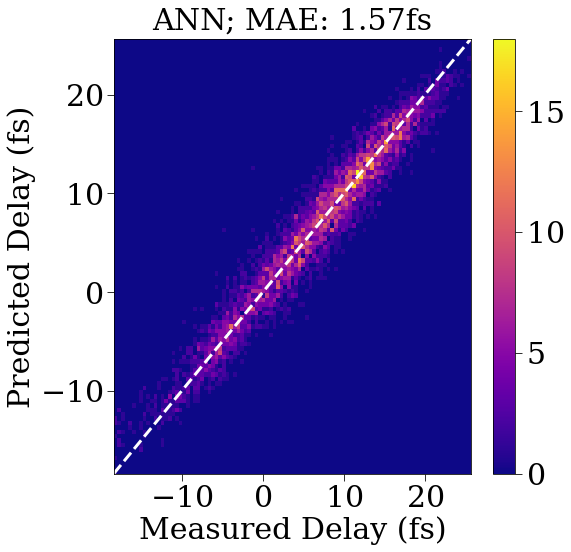

(<keras.engine.sequential.Sequential at 0x7fb148348130>,
 <keras.callbacks.History at 0x7fb1055577f0>)

<Figure size 432x288 with 0 Axes>

In [6]:
ann_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "oldMode2017/results/ex_1_ann_feat/ann_pred.npz",
    "plot_fname": "oldMode2017/results/ex_1_ann_feat/ann_hist2d",
}

ann_pipeline(data, ann_str_data)

#### Feature selection

Now let us see how the results change if we scramble individual features (called permutation feature importance).

In [ ]:
ann_feat_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "PaperFigures/Figure Data/Figure 3/ann_delay.npz",
    "plot_fname": "oldMode2017/results/ex_1_ann_feat/ann_low_delays_hist2d",
}


ann_feature_pipeline(data, ann_feat_str_data)

Starting ann training...
Epoch 1/5000


2022-03-07 13:11:59.306778: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-07 13:11:59.306857: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-07 13:11:59.306894: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (karim-ThinkPad-E595): /proc/driver/nvidia/version does not exist
2022-03-07 13:11:59.307171: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-07 13:11:59.394447: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the

24/24 - 1s - loss: 1.4031 - mae: 0.8744 - val_loss: 1.3923 - val_mae: 0.8647
Epoch 2/5000
24/24 - 0s - loss: 1.3696 - mae: 0.8429 - val_loss: 1.3644 - val_mae: 0.8387
Epoch 3/5000
24/24 - 0s - loss: 1.3444 - mae: 0.8195 - val_loss: 1.3417 - val_mae: 0.8178
Epoch 4/5000
24/24 - 0s - loss: 1.3236 - mae: 0.8005 - val_loss: 1.3224 - val_mae: 0.8003
Epoch 5/5000
24/24 - 0s - loss: 1.3055 - mae: 0.7842 - val_loss: 1.3056 - val_mae: 0.7851
Epoch 6/5000
24/24 - 0s - loss: 1.2896 - mae: 0.7699 - val_loss: 1.2905 - val_mae: 0.7716
Epoch 7/5000
24/24 - 0s - loss: 1.2753 - mae: 0.7572 - val_loss: 1.2769 - val_mae: 0.7596
Epoch 8/5000
24/24 - 0s - loss: 1.2624 - mae: 0.7458 - val_loss: 1.2644 - val_mae: 0.7487
Epoch 9/5000
24/24 - 0s - loss: 1.2504 - mae: 0.7354 - val_loss: 1.2529 - val_mae: 0.7386
Epoch 10/5000
24/24 - 0s - loss: 1.2394 - mae: 0.7258 - val_loss: 1.2422 - val_mae: 0.7294
Epoch 11/5000
24/24 - 0s - loss: 1.2291 - mae: 0.7170 - val_loss: 1.2322 - val_mae: 0.7209
Epoch 12/5000
24/24 -

Epoch 92/5000
24/24 - 0s - loss: 0.8624 - mae: 0.4364 - val_loss: 0.8687 - val_mae: 0.4431
Epoch 93/5000
24/24 - 0s - loss: 0.8600 - mae: 0.4348 - val_loss: 0.8662 - val_mae: 0.4415
Epoch 94/5000
24/24 - 0s - loss: 0.8575 - mae: 0.4332 - val_loss: 0.8638 - val_mae: 0.4399
Epoch 95/5000
24/24 - 0s - loss: 0.8550 - mae: 0.4316 - val_loss: 0.8614 - val_mae: 0.4383
Epoch 96/5000
24/24 - 0s - loss: 0.8526 - mae: 0.4300 - val_loss: 0.8590 - val_mae: 0.4368
Epoch 97/5000
24/24 - 0s - loss: 0.8502 - mae: 0.4284 - val_loss: 0.8566 - val_mae: 0.4352
Epoch 98/5000
24/24 - 0s - loss: 0.8478 - mae: 0.4268 - val_loss: 0.8543 - val_mae: 0.4337
Epoch 99/5000
24/24 - 0s - loss: 0.8454 - mae: 0.4253 - val_loss: 0.8519 - val_mae: 0.4322
Epoch 100/5000
24/24 - 0s - loss: 0.8431 - mae: 0.4238 - val_loss: 0.8496 - val_mae: 0.4307
Epoch 101/5000
24/24 - 0s - loss: 0.8407 - mae: 0.4223 - val_loss: 0.8473 - val_mae: 0.4292
Epoch 102/5000
24/24 - 0s - loss: 0.8384 - mae: 0.4208 - val_loss: 0.8450 - val_mae: 0.4

24/24 - 0s - loss: 0.7034 - mae: 0.3419 - val_loss: 0.7126 - val_mae: 0.3514
Epoch 182/5000
24/24 - 0s - loss: 0.7022 - mae: 0.3412 - val_loss: 0.7114 - val_mae: 0.3508
Epoch 183/5000
24/24 - 0s - loss: 0.7009 - mae: 0.3406 - val_loss: 0.7101 - val_mae: 0.3501
Epoch 184/5000
24/24 - 0s - loss: 0.6996 - mae: 0.3399 - val_loss: 0.7089 - val_mae: 0.3495
Epoch 185/5000
24/24 - 0s - loss: 0.6984 - mae: 0.3393 - val_loss: 0.7076 - val_mae: 0.3489
Epoch 186/5000
24/24 - 0s - loss: 0.6971 - mae: 0.3386 - val_loss: 0.7064 - val_mae: 0.3483
Epoch 187/5000
24/24 - 0s - loss: 0.6959 - mae: 0.3380 - val_loss: 0.7052 - val_mae: 0.3476
Epoch 188/5000
24/24 - 0s - loss: 0.6946 - mae: 0.3374 - val_loss: 0.7039 - val_mae: 0.3470
Epoch 189/5000
24/24 - 0s - loss: 0.6934 - mae: 0.3367 - val_loss: 0.7027 - val_mae: 0.3464
Epoch 190/5000
24/24 - 0s - loss: 0.6921 - mae: 0.3361 - val_loss: 0.7015 - val_mae: 0.3458
Epoch 191/5000
24/24 - 0s - loss: 0.6909 - mae: 0.3355 - val_loss: 0.7003 - val_mae: 0.3452
Epo

Epoch 271/5000
24/24 - 0s - loss: 0.6108 - mae: 0.2984 - val_loss: 0.6201 - val_mae: 0.3080
Epoch 272/5000
24/24 - 0s - loss: 0.6100 - mae: 0.2981 - val_loss: 0.6193 - val_mae: 0.3077
Epoch 273/5000
24/24 - 0s - loss: 0.6091 - mae: 0.2977 - val_loss: 0.6185 - val_mae: 0.3073
Epoch 274/5000
24/24 - 0s - loss: 0.6083 - mae: 0.2974 - val_loss: 0.6176 - val_mae: 0.3070
Epoch 275/5000
24/24 - 0s - loss: 0.6075 - mae: 0.2970 - val_loss: 0.6168 - val_mae: 0.3066
Epoch 276/5000
24/24 - 0s - loss: 0.6067 - mae: 0.2967 - val_loss: 0.6160 - val_mae: 0.3063
Epoch 277/5000
24/24 - 0s - loss: 0.6059 - mae: 0.2964 - val_loss: 0.6152 - val_mae: 0.3059
Epoch 278/5000
24/24 - 0s - loss: 0.6051 - mae: 0.2960 - val_loss: 0.6144 - val_mae: 0.3056
Epoch 279/5000
24/24 - 0s - loss: 0.6043 - mae: 0.2957 - val_loss: 0.6135 - val_mae: 0.3052
Epoch 280/5000
24/24 - 0s - loss: 0.6035 - mae: 0.2954 - val_loss: 0.6127 - val_mae: 0.3049
Epoch 281/5000
24/24 - 0s - loss: 0.6027 - mae: 0.2950 - val_loss: 0.6119 - val_

24/24 - 0s - loss: 0.5479 - mae: 0.2737 - val_loss: 0.5561 - val_mae: 0.2821
Epoch 361/5000
24/24 - 0s - loss: 0.5473 - mae: 0.2735 - val_loss: 0.5555 - val_mae: 0.2818
Epoch 362/5000
24/24 - 0s - loss: 0.5467 - mae: 0.2733 - val_loss: 0.5549 - val_mae: 0.2816
Epoch 363/5000
24/24 - 0s - loss: 0.5461 - mae: 0.2730 - val_loss: 0.5543 - val_mae: 0.2814
Epoch 364/5000
24/24 - 0s - loss: 0.5455 - mae: 0.2728 - val_loss: 0.5536 - val_mae: 0.2811
Epoch 365/5000
24/24 - 0s - loss: 0.5449 - mae: 0.2726 - val_loss: 0.5530 - val_mae: 0.2809
Epoch 366/5000
24/24 - 0s - loss: 0.5443 - mae: 0.2724 - val_loss: 0.5524 - val_mae: 0.2807
Epoch 367/5000
24/24 - 0s - loss: 0.5437 - mae: 0.2722 - val_loss: 0.5518 - val_mae: 0.2805
Epoch 368/5000
24/24 - 0s - loss: 0.5431 - mae: 0.2720 - val_loss: 0.5512 - val_mae: 0.2802
Epoch 369/5000
24/24 - 0s - loss: 0.5426 - mae: 0.2718 - val_loss: 0.5506 - val_mae: 0.2800
Epoch 370/5000
24/24 - 0s - loss: 0.5420 - mae: 0.2715 - val_loss: 0.5500 - val_mae: 0.2798
Epo

Epoch 450/5000
24/24 - 0s - loss: 0.4996 - mae: 0.2563 - val_loss: 0.5065 - val_mae: 0.2635
Epoch 451/5000
24/24 - 0s - loss: 0.4991 - mae: 0.2562 - val_loss: 0.5061 - val_mae: 0.2633
Epoch 452/5000
24/24 - 0s - loss: 0.4986 - mae: 0.2560 - val_loss: 0.5056 - val_mae: 0.2631
Epoch 453/5000
24/24 - 0s - loss: 0.4982 - mae: 0.2558 - val_loss: 0.5051 - val_mae: 0.2629
Epoch 454/5000
24/24 - 0s - loss: 0.4977 - mae: 0.2557 - val_loss: 0.5046 - val_mae: 0.2627
Epoch 455/5000
24/24 - 0s - loss: 0.4972 - mae: 0.2555 - val_loss: 0.5041 - val_mae: 0.2626
Epoch 456/5000
24/24 - 0s - loss: 0.4967 - mae: 0.2553 - val_loss: 0.5036 - val_mae: 0.2624
Epoch 457/5000
24/24 - 0s - loss: 0.4963 - mae: 0.2552 - val_loss: 0.5031 - val_mae: 0.2622
Epoch 458/5000
24/24 - 0s - loss: 0.4958 - mae: 0.2550 - val_loss: 0.5026 - val_mae: 0.2620
Epoch 459/5000
24/24 - 0s - loss: 0.4953 - mae: 0.2549 - val_loss: 0.5021 - val_mae: 0.2618
Epoch 460/5000
24/24 - 0s - loss: 0.4949 - mae: 0.2547 - val_loss: 0.5017 - val_

24/24 - 0s - loss: 0.4615 - mae: 0.2434 - val_loss: 0.4676 - val_mae: 0.2496
Epoch 540/5000
24/24 - 0s - loss: 0.4612 - mae: 0.2433 - val_loss: 0.4673 - val_mae: 0.2495
Epoch 541/5000
24/24 - 0s - loss: 0.4608 - mae: 0.2431 - val_loss: 0.4669 - val_mae: 0.2494
Epoch 542/5000
24/24 - 0s - loss: 0.4604 - mae: 0.2430 - val_loss: 0.4665 - val_mae: 0.2492
Epoch 543/5000
24/24 - 0s - loss: 0.4600 - mae: 0.2429 - val_loss: 0.4661 - val_mae: 0.2491
Epoch 544/5000
24/24 - 0s - loss: 0.4596 - mae: 0.2428 - val_loss: 0.4657 - val_mae: 0.2490
Epoch 545/5000
24/24 - 0s - loss: 0.4593 - mae: 0.2426 - val_loss: 0.4653 - val_mae: 0.2489
Epoch 546/5000
24/24 - 0s - loss: 0.4589 - mae: 0.2425 - val_loss: 0.4650 - val_mae: 0.2487
Epoch 547/5000
24/24 - 0s - loss: 0.4585 - mae: 0.2424 - val_loss: 0.4646 - val_mae: 0.2486
Epoch 548/5000
24/24 - 0s - loss: 0.4581 - mae: 0.2423 - val_loss: 0.4642 - val_mae: 0.2485
Epoch 549/5000
24/24 - 0s - loss: 0.4578 - mae: 0.2422 - val_loss: 0.4638 - val_mae: 0.2484
Epo

Epoch 629/5000
24/24 - 0s - loss: 0.4305 - mae: 0.2335 - val_loss: 0.4361 - val_mae: 0.2392
Epoch 630/5000
24/24 - 0s - loss: 0.4302 - mae: 0.2334 - val_loss: 0.4357 - val_mae: 0.2391
Epoch 631/5000
24/24 - 0s - loss: 0.4299 - mae: 0.2333 - val_loss: 0.4354 - val_mae: 0.2390
Epoch 632/5000
24/24 - 0s - loss: 0.4296 - mae: 0.2332 - val_loss: 0.4351 - val_mae: 0.2389
Epoch 633/5000
24/24 - 0s - loss: 0.4293 - mae: 0.2331 - val_loss: 0.4348 - val_mae: 0.2388
Epoch 634/5000
24/24 - 0s - loss: 0.4289 - mae: 0.2330 - val_loss: 0.4345 - val_mae: 0.2386
Epoch 635/5000
24/24 - 0s - loss: 0.4286 - mae: 0.2329 - val_loss: 0.4342 - val_mae: 0.2385
Epoch 636/5000
24/24 - 0s - loss: 0.4283 - mae: 0.2328 - val_loss: 0.4338 - val_mae: 0.2384
Epoch 637/5000
24/24 - 0s - loss: 0.4280 - mae: 0.2327 - val_loss: 0.4335 - val_mae: 0.2383
Epoch 638/5000
24/24 - 0s - loss: 0.4277 - mae: 0.2326 - val_loss: 0.4332 - val_mae: 0.2382
Epoch 639/5000
24/24 - 0s - loss: 0.4274 - mae: 0.2325 - val_loss: 0.4329 - val_

24/24 - 0s - loss: 0.4053 - mae: 0.2260 - val_loss: 0.4105 - val_mae: 0.2312
Epoch 719/5000
24/24 - 0s - loss: 0.4051 - mae: 0.2259 - val_loss: 0.4102 - val_mae: 0.2311
Epoch 720/5000
24/24 - 0s - loss: 0.4048 - mae: 0.2258 - val_loss: 0.4100 - val_mae: 0.2311
Epoch 721/5000
24/24 - 0s - loss: 0.4046 - mae: 0.2257 - val_loss: 0.4097 - val_mae: 0.2310
Epoch 722/5000
24/24 - 0s - loss: 0.4043 - mae: 0.2257 - val_loss: 0.4094 - val_mae: 0.2309
Epoch 723/5000
24/24 - 0s - loss: 0.4040 - mae: 0.2256 - val_loss: 0.4092 - val_mae: 0.2308
Epoch 724/5000
24/24 - 0s - loss: 0.4038 - mae: 0.2255 - val_loss: 0.4089 - val_mae: 0.2308
Epoch 725/5000
24/24 - 0s - loss: 0.4035 - mae: 0.2254 - val_loss: 0.4087 - val_mae: 0.2307
Epoch 726/5000
24/24 - 0s - loss: 0.4033 - mae: 0.2254 - val_loss: 0.4084 - val_mae: 0.2306
Epoch 727/5000
24/24 - 0s - loss: 0.4030 - mae: 0.2253 - val_loss: 0.4082 - val_mae: 0.2306
Epoch 728/5000
24/24 - 0s - loss: 0.4028 - mae: 0.2252 - val_loss: 0.4079 - val_mae: 0.2305
Epo

Epoch 808/5000
24/24 - 0s - loss: 0.3842 - mae: 0.2200 - val_loss: 0.3894 - val_mae: 0.2252
Epoch 809/5000
24/24 - 0s - loss: 0.3840 - mae: 0.2199 - val_loss: 0.3892 - val_mae: 0.2252
Epoch 810/5000
24/24 - 0s - loss: 0.3837 - mae: 0.2198 - val_loss: 0.3889 - val_mae: 0.2251
Epoch 811/5000
24/24 - 0s - loss: 0.3835 - mae: 0.2198 - val_loss: 0.3887 - val_mae: 0.2251
Epoch 812/5000
24/24 - 0s - loss: 0.3833 - mae: 0.2197 - val_loss: 0.3885 - val_mae: 0.2250
Epoch 813/5000
24/24 - 0s - loss: 0.3831 - mae: 0.2197 - val_loss: 0.3883 - val_mae: 0.2249
Epoch 814/5000
24/24 - 0s - loss: 0.3829 - mae: 0.2196 - val_loss: 0.3881 - val_mae: 0.2249
Epoch 815/5000
24/24 - 0s - loss: 0.3827 - mae: 0.2195 - val_loss: 0.3879 - val_mae: 0.2248
Epoch 816/5000
24/24 - 0s - loss: 0.3825 - mae: 0.2195 - val_loss: 0.3877 - val_mae: 0.2248
Epoch 817/5000
24/24 - 0s - loss: 0.3822 - mae: 0.2194 - val_loss: 0.3874 - val_mae: 0.2247
Epoch 818/5000
24/24 - 0s - loss: 0.3820 - mae: 0.2194 - val_loss: 0.3872 - val_

24/24 - 0s - loss: 0.3665 - mae: 0.2152 - val_loss: 0.3719 - val_mae: 0.2206
Epoch 898/5000
24/24 - 0s - loss: 0.3663 - mae: 0.2151 - val_loss: 0.3717 - val_mae: 0.2206
Epoch 899/5000
24/24 - 0s - loss: 0.3662 - mae: 0.2151 - val_loss: 0.3715 - val_mae: 0.2205
Epoch 900/5000
24/24 - 0s - loss: 0.3660 - mae: 0.2150 - val_loss: 0.3713 - val_mae: 0.2205
Epoch 901/5000
24/24 - 0s - loss: 0.3658 - mae: 0.2150 - val_loss: 0.3712 - val_mae: 0.2204
Epoch 902/5000
24/24 - 0s - loss: 0.3656 - mae: 0.2149 - val_loss: 0.3710 - val_mae: 0.2204
Epoch 903/5000
24/24 - 0s - loss: 0.3654 - mae: 0.2149 - val_loss: 0.3708 - val_mae: 0.2203
Epoch 904/5000
24/24 - 0s - loss: 0.3652 - mae: 0.2148 - val_loss: 0.3706 - val_mae: 0.2203
Epoch 905/5000
24/24 - 0s - loss: 0.3651 - mae: 0.2148 - val_loss: 0.3704 - val_mae: 0.2202
Epoch 906/5000
24/24 - 0s - loss: 0.3649 - mae: 0.2147 - val_loss: 0.3703 - val_mae: 0.2202
Epoch 907/5000
24/24 - 0s - loss: 0.3647 - mae: 0.2147 - val_loss: 0.3701 - val_mae: 0.2201
Epo

Epoch 987/5000
24/24 - 0s - loss: 0.3514 - mae: 0.2113 - val_loss: 0.3570 - val_mae: 0.2170
Epoch 988/5000
24/24 - 0s - loss: 0.3512 - mae: 0.2113 - val_loss: 0.3568 - val_mae: 0.2169
Epoch 989/5000
24/24 - 0s - loss: 0.3511 - mae: 0.2112 - val_loss: 0.3567 - val_mae: 0.2169
Epoch 990/5000
24/24 - 0s - loss: 0.3509 - mae: 0.2112 - val_loss: 0.3565 - val_mae: 0.2168
Epoch 991/5000
24/24 - 0s - loss: 0.3507 - mae: 0.2111 - val_loss: 0.3564 - val_mae: 0.2168
Epoch 992/5000
24/24 - 0s - loss: 0.3506 - mae: 0.2111 - val_loss: 0.3562 - val_mae: 0.2168
Epoch 993/5000
24/24 - 0s - loss: 0.3504 - mae: 0.2111 - val_loss: 0.3561 - val_mae: 0.2168
Epoch 994/5000
24/24 - 0s - loss: 0.3503 - mae: 0.2110 - val_loss: 0.3559 - val_mae: 0.2167
Epoch 995/5000
24/24 - 0s - loss: 0.3501 - mae: 0.2110 - val_loss: 0.3558 - val_mae: 0.2167
Epoch 996/5000
24/24 - 0s - loss: 0.3500 - mae: 0.2110 - val_loss: 0.3556 - val_mae: 0.2167
Epoch 997/5000
24/24 - 0s - loss: 0.3498 - mae: 0.2109 - val_loss: 0.3555 - val_

Epoch 1076/5000
24/24 - 0s - loss: 0.3386 - mae: 0.2083 - val_loss: 0.3445 - val_mae: 0.2142
Epoch 1077/5000
24/24 - 0s - loss: 0.3384 - mae: 0.2082 - val_loss: 0.3444 - val_mae: 0.2142
Epoch 1078/5000
24/24 - 0s - loss: 0.3383 - mae: 0.2082 - val_loss: 0.3442 - val_mae: 0.2142
Epoch 1079/5000
24/24 - 0s - loss: 0.3382 - mae: 0.2082 - val_loss: 0.3441 - val_mae: 0.2142
Epoch 1080/5000
24/24 - 0s - loss: 0.3380 - mae: 0.2081 - val_loss: 0.3440 - val_mae: 0.2141
Epoch 1081/5000
24/24 - 0s - loss: 0.3379 - mae: 0.2081 - val_loss: 0.3439 - val_mae: 0.2141
Epoch 1082/5000
24/24 - 0s - loss: 0.3378 - mae: 0.2081 - val_loss: 0.3437 - val_mae: 0.2141
Epoch 1083/5000
24/24 - 0s - loss: 0.3377 - mae: 0.2080 - val_loss: 0.3436 - val_mae: 0.2141
Epoch 1084/5000
24/24 - 0s - loss: 0.3375 - mae: 0.2080 - val_loss: 0.3435 - val_mae: 0.2140
Epoch 1085/5000
24/24 - 0s - loss: 0.3374 - mae: 0.2080 - val_loss: 0.3434 - val_mae: 0.2140
Epoch 1086/5000
24/24 - 0s - loss: 0.3373 - mae: 0.2080 - val_loss: 0.

Epoch 1165/5000
24/24 - 0s - loss: 0.3275 - mae: 0.2058 - val_loss: 0.3339 - val_mae: 0.2122
Epoch 1166/5000
24/24 - 0s - loss: 0.3274 - mae: 0.2057 - val_loss: 0.3338 - val_mae: 0.2122
Epoch 1167/5000
24/24 - 0s - loss: 0.3273 - mae: 0.2057 - val_loss: 0.3337 - val_mae: 0.2122
Epoch 1168/5000
24/24 - 0s - loss: 0.3272 - mae: 0.2057 - val_loss: 0.3336 - val_mae: 0.2122
Epoch 1169/5000
24/24 - 0s - loss: 0.3271 - mae: 0.2057 - val_loss: 0.3335 - val_mae: 0.2121
Epoch 1170/5000
24/24 - 0s - loss: 0.3269 - mae: 0.2056 - val_loss: 0.3333 - val_mae: 0.2121
Epoch 1171/5000
24/24 - 0s - loss: 0.3268 - mae: 0.2056 - val_loss: 0.3332 - val_mae: 0.2121
Epoch 1172/5000
24/24 - 0s - loss: 0.3267 - mae: 0.2056 - val_loss: 0.3331 - val_mae: 0.2121
Epoch 1173/5000
24/24 - 0s - loss: 0.3266 - mae: 0.2056 - val_loss: 0.3330 - val_mae: 0.2121
Epoch 1174/5000
24/24 - 0s - loss: 0.3265 - mae: 0.2055 - val_loss: 0.3329 - val_mae: 0.2120
Epoch 1175/5000
24/24 - 0s - loss: 0.3264 - mae: 0.2055 - val_loss: 0.

24/24 - 0s - loss: 0.3179 - mae: 0.2037 - val_loss: 0.3247 - val_mae: 0.2105
Epoch 1254/5000
24/24 - 0s - loss: 0.3178 - mae: 0.2037 - val_loss: 0.3246 - val_mae: 0.2104
Epoch 1255/5000
24/24 - 0s - loss: 0.3177 - mae: 0.2036 - val_loss: 0.3245 - val_mae: 0.2104
Epoch 1256/5000
24/24 - 0s - loss: 0.3176 - mae: 0.2036 - val_loss: 0.3244 - val_mae: 0.2104
Epoch 1257/5000
24/24 - 0s - loss: 0.3175 - mae: 0.2036 - val_loss: 0.3243 - val_mae: 0.2104
Epoch 1258/5000
24/24 - 0s - loss: 0.3174 - mae: 0.2036 - val_loss: 0.3242 - val_mae: 0.2104
Epoch 1259/5000
24/24 - 0s - loss: 0.3173 - mae: 0.2035 - val_loss: 0.3241 - val_mae: 0.2104
Epoch 1260/5000
24/24 - 0s - loss: 0.3172 - mae: 0.2035 - val_loss: 0.3240 - val_mae: 0.2103
Epoch 1261/5000
24/24 - 0s - loss: 0.3171 - mae: 0.2035 - val_loss: 0.3239 - val_mae: 0.2103
Epoch 1262/5000
24/24 - 0s - loss: 0.3170 - mae: 0.2035 - val_loss: 0.3238 - val_mae: 0.2103
Epoch 1263/5000
24/24 - 0s - loss: 0.3169 - mae: 0.2035 - val_loss: 0.3237 - val_mae: 

Epoch 1342/5000
24/24 - 0s - loss: 0.3094 - mae: 0.2019 - val_loss: 0.3163 - val_mae: 0.2089
Epoch 1343/5000
24/24 - 0s - loss: 0.3093 - mae: 0.2019 - val_loss: 0.3162 - val_mae: 0.2088
Epoch 1344/5000
24/24 - 0s - loss: 0.3092 - mae: 0.2018 - val_loss: 0.3162 - val_mae: 0.2088
Epoch 1345/5000
24/24 - 0s - loss: 0.3091 - mae: 0.2018 - val_loss: 0.3160 - val_mae: 0.2088
Epoch 1346/5000
24/24 - 0s - loss: 0.3090 - mae: 0.2018 - val_loss: 0.3160 - val_mae: 0.2088
Epoch 1347/5000
24/24 - 0s - loss: 0.3090 - mae: 0.2018 - val_loss: 0.3159 - val_mae: 0.2087
Epoch 1348/5000
24/24 - 0s - loss: 0.3089 - mae: 0.2018 - val_loss: 0.3158 - val_mae: 0.2087
Epoch 1349/5000
24/24 - 0s - loss: 0.3088 - mae: 0.2018 - val_loss: 0.3157 - val_mae: 0.2087
Epoch 1350/5000
24/24 - 0s - loss: 0.3087 - mae: 0.2017 - val_loss: 0.3156 - val_mae: 0.2087
Epoch 1351/5000
24/24 - 0s - loss: 0.3086 - mae: 0.2017 - val_loss: 0.3155 - val_mae: 0.2087
Epoch 1352/5000
24/24 - 0s - loss: 0.3085 - mae: 0.2017 - val_loss: 0.

24/24 - 0s - loss: 0.3019 - mae: 0.2004 - val_loss: 0.3089 - val_mae: 0.2074
Epoch 1431/5000
24/24 - 0s - loss: 0.3019 - mae: 0.2004 - val_loss: 0.3088 - val_mae: 0.2074
Epoch 1432/5000
24/24 - 0s - loss: 0.3018 - mae: 0.2004 - val_loss: 0.3088 - val_mae: 0.2074
Epoch 1433/5000
24/24 - 0s - loss: 0.3017 - mae: 0.2003 - val_loss: 0.3087 - val_mae: 0.2074
Epoch 1434/5000
24/24 - 0s - loss: 0.3016 - mae: 0.2003 - val_loss: 0.3086 - val_mae: 0.2074
Epoch 1435/5000
24/24 - 0s - loss: 0.3015 - mae: 0.2003 - val_loss: 0.3085 - val_mae: 0.2073
Epoch 1436/5000
24/24 - 0s - loss: 0.3015 - mae: 0.2003 - val_loss: 0.3084 - val_mae: 0.2073
Epoch 1437/5000
24/24 - 0s - loss: 0.3014 - mae: 0.2003 - val_loss: 0.3084 - val_mae: 0.2073
Epoch 1438/5000
24/24 - 0s - loss: 0.3013 - mae: 0.2003 - val_loss: 0.3083 - val_mae: 0.2073
Epoch 1439/5000
24/24 - 0s - loss: 0.3012 - mae: 0.2002 - val_loss: 0.3082 - val_mae: 0.2073
Epoch 1440/5000
24/24 - 0s - loss: 0.3011 - mae: 0.2002 - val_loss: 0.3081 - val_mae: 

Epoch 1519/5000
24/24 - 0s - loss: 0.2952 - mae: 0.1991 - val_loss: 0.3023 - val_mae: 0.2062
Epoch 1520/5000
24/24 - 0s - loss: 0.2952 - mae: 0.1991 - val_loss: 0.3022 - val_mae: 0.2062
Epoch 1521/5000
24/24 - 0s - loss: 0.2951 - mae: 0.1991 - val_loss: 0.3022 - val_mae: 0.2062
Epoch 1522/5000
24/24 - 0s - loss: 0.2950 - mae: 0.1991 - val_loss: 0.3021 - val_mae: 0.2061
Epoch 1523/5000
24/24 - 0s - loss: 0.2950 - mae: 0.1991 - val_loss: 0.3020 - val_mae: 0.2061
Epoch 1524/5000
24/24 - 0s - loss: 0.2949 - mae: 0.1990 - val_loss: 0.3020 - val_mae: 0.2061
Epoch 1525/5000
24/24 - 0s - loss: 0.2948 - mae: 0.1990 - val_loss: 0.3019 - val_mae: 0.2061
Epoch 1526/5000
24/24 - 0s - loss: 0.2948 - mae: 0.1990 - val_loss: 0.3018 - val_mae: 0.2061
Epoch 1527/5000
24/24 - 0s - loss: 0.2947 - mae: 0.1990 - val_loss: 0.3017 - val_mae: 0.2061
Epoch 1528/5000
24/24 - 0s - loss: 0.2946 - mae: 0.1990 - val_loss: 0.3017 - val_mae: 0.2061
Epoch 1529/5000
24/24 - 0s - loss: 0.2945 - mae: 0.1990 - val_loss: 0.

24/24 - 0s - loss: 0.2893 - mae: 0.1980 - val_loss: 0.2965 - val_mae: 0.2052
Epoch 1608/5000
24/24 - 0s - loss: 0.2893 - mae: 0.1980 - val_loss: 0.2964 - val_mae: 0.2051
Epoch 1609/5000
24/24 - 0s - loss: 0.2892 - mae: 0.1980 - val_loss: 0.2963 - val_mae: 0.2051
Epoch 1610/5000
24/24 - 0s - loss: 0.2891 - mae: 0.1980 - val_loss: 0.2963 - val_mae: 0.2051
Epoch 1611/5000
24/24 - 0s - loss: 0.2891 - mae: 0.1979 - val_loss: 0.2962 - val_mae: 0.2051
Epoch 1612/5000
24/24 - 0s - loss: 0.2890 - mae: 0.1979 - val_loss: 0.2962 - val_mae: 0.2051
Epoch 1613/5000
24/24 - 0s - loss: 0.2889 - mae: 0.1979 - val_loss: 0.2961 - val_mae: 0.2051
Epoch 1614/5000
24/24 - 0s - loss: 0.2889 - mae: 0.1979 - val_loss: 0.2960 - val_mae: 0.2051
Epoch 1615/5000
24/24 - 0s - loss: 0.2888 - mae: 0.1979 - val_loss: 0.2960 - val_mae: 0.2051
Epoch 1616/5000
24/24 - 0s - loss: 0.2887 - mae: 0.1979 - val_loss: 0.2959 - val_mae: 0.2051
Epoch 1617/5000
24/24 - 0s - loss: 0.2887 - mae: 0.1979 - val_loss: 0.2958 - val_mae: 

Epoch 1696/5000
24/24 - 0s - loss: 0.2839 - mae: 0.1970 - val_loss: 0.2911 - val_mae: 0.2042
Epoch 1697/5000
24/24 - 0s - loss: 0.2839 - mae: 0.1970 - val_loss: 0.2910 - val_mae: 0.2042
Epoch 1698/5000
24/24 - 0s - loss: 0.2838 - mae: 0.1970 - val_loss: 0.2910 - val_mae: 0.2042
Epoch 1699/5000
24/24 - 0s - loss: 0.2837 - mae: 0.1970 - val_loss: 0.2909 - val_mae: 0.2042
Epoch 1700/5000
24/24 - 0s - loss: 0.2837 - mae: 0.1969 - val_loss: 0.2908 - val_mae: 0.2041
Epoch 1701/5000
24/24 - 0s - loss: 0.2836 - mae: 0.1969 - val_loss: 0.2908 - val_mae: 0.2041
Epoch 1702/5000
24/24 - 0s - loss: 0.2836 - mae: 0.1969 - val_loss: 0.2907 - val_mae: 0.2041
Epoch 1703/5000
24/24 - 0s - loss: 0.2835 - mae: 0.1969 - val_loss: 0.2907 - val_mae: 0.2041
Epoch 1704/5000
24/24 - 0s - loss: 0.2834 - mae: 0.1969 - val_loss: 0.2906 - val_mae: 0.2041
Epoch 1705/5000
24/24 - 0s - loss: 0.2834 - mae: 0.1969 - val_loss: 0.2906 - val_mae: 0.2041
Epoch 1706/5000
24/24 - 0s - loss: 0.2833 - mae: 0.1969 - val_loss: 0.

24/24 - 0s - loss: 0.2790 - mae: 0.1961 - val_loss: 0.2862 - val_mae: 0.2032
Epoch 1785/5000
24/24 - 0s - loss: 0.2790 - mae: 0.1961 - val_loss: 0.2861 - val_mae: 0.2032
Epoch 1786/5000
24/24 - 0s - loss: 0.2789 - mae: 0.1960 - val_loss: 0.2861 - val_mae: 0.2032
Epoch 1787/5000
24/24 - 0s - loss: 0.2789 - mae: 0.1960 - val_loss: 0.2860 - val_mae: 0.2032
Epoch 1788/5000
24/24 - 0s - loss: 0.2788 - mae: 0.1960 - val_loss: 0.2860 - val_mae: 0.2032
Epoch 1789/5000
24/24 - 0s - loss: 0.2788 - mae: 0.1960 - val_loss: 0.2859 - val_mae: 0.2032
Epoch 1790/5000
24/24 - 0s - loss: 0.2787 - mae: 0.1960 - val_loss: 0.2859 - val_mae: 0.2032
Epoch 1791/5000
24/24 - 0s - loss: 0.2787 - mae: 0.1960 - val_loss: 0.2858 - val_mae: 0.2032
Epoch 1792/5000
24/24 - 0s - loss: 0.2786 - mae: 0.1960 - val_loss: 0.2858 - val_mae: 0.2032
Epoch 1793/5000
24/24 - 0s - loss: 0.2786 - mae: 0.1960 - val_loss: 0.2857 - val_mae: 0.2031
Epoch 1794/5000
24/24 - 0s - loss: 0.2785 - mae: 0.1960 - val_loss: 0.2856 - val_mae: 

Epoch 1873/5000
24/24 - 0s - loss: 0.2745 - mae: 0.1952 - val_loss: 0.2817 - val_mae: 0.2024
Epoch 1874/5000
24/24 - 0s - loss: 0.2745 - mae: 0.1952 - val_loss: 0.2816 - val_mae: 0.2024
Epoch 1875/5000
24/24 - 0s - loss: 0.2744 - mae: 0.1952 - val_loss: 0.2816 - val_mae: 0.2024
Epoch 1876/5000
24/24 - 0s - loss: 0.2744 - mae: 0.1952 - val_loss: 0.2815 - val_mae: 0.2024
Epoch 1877/5000
24/24 - 0s - loss: 0.2743 - mae: 0.1952 - val_loss: 0.2815 - val_mae: 0.2023
Epoch 1878/5000
24/24 - 0s - loss: 0.2743 - mae: 0.1951 - val_loss: 0.2814 - val_mae: 0.2023
Epoch 1879/5000
24/24 - 0s - loss: 0.2742 - mae: 0.1951 - val_loss: 0.2814 - val_mae: 0.2023
Epoch 1880/5000
24/24 - 0s - loss: 0.2742 - mae: 0.1951 - val_loss: 0.2814 - val_mae: 0.2023
Epoch 1881/5000
24/24 - 0s - loss: 0.2741 - mae: 0.1951 - val_loss: 0.2813 - val_mae: 0.2023
Epoch 1882/5000
24/24 - 0s - loss: 0.2741 - mae: 0.1951 - val_loss: 0.2813 - val_mae: 0.2023
Epoch 1883/5000
24/24 - 0s - loss: 0.2740 - mae: 0.1951 - val_loss: 0.

24/24 - 0s - loss: 0.2705 - mae: 0.1944 - val_loss: 0.2778 - val_mae: 0.2017
Epoch 1962/5000
24/24 - 0s - loss: 0.2704 - mae: 0.1944 - val_loss: 0.2777 - val_mae: 0.2018
Epoch 1963/5000
24/24 - 0s - loss: 0.2704 - mae: 0.1944 - val_loss: 0.2777 - val_mae: 0.2017
Epoch 1964/5000
24/24 - 0s - loss: 0.2703 - mae: 0.1944 - val_loss: 0.2777 - val_mae: 0.2017
Epoch 1965/5000
24/24 - 0s - loss: 0.2703 - mae: 0.1944 - val_loss: 0.2776 - val_mae: 0.2017
Epoch 1966/5000
24/24 - 0s - loss: 0.2703 - mae: 0.1944 - val_loss: 0.2776 - val_mae: 0.2017
Epoch 1967/5000
24/24 - 0s - loss: 0.2702 - mae: 0.1944 - val_loss: 0.2775 - val_mae: 0.2017
Epoch 1968/5000
24/24 - 0s - loss: 0.2702 - mae: 0.1944 - val_loss: 0.2775 - val_mae: 0.2017
Epoch 1969/5000
24/24 - 0s - loss: 0.2701 - mae: 0.1944 - val_loss: 0.2775 - val_mae: 0.2017
Epoch 1970/5000
24/24 - 0s - loss: 0.2701 - mae: 0.1944 - val_loss: 0.2774 - val_mae: 0.2017
Epoch 1971/5000
24/24 - 0s - loss: 0.2700 - mae: 0.1943 - val_loss: 0.2774 - val_mae: 

Epoch 2050/5000
24/24 - 0s - loss: 0.2667 - mae: 0.1937 - val_loss: 0.2742 - val_mae: 0.2012
Epoch 2051/5000
24/24 - 0s - loss: 0.2667 - mae: 0.1937 - val_loss: 0.2742 - val_mae: 0.2012
Epoch 2052/5000
24/24 - 0s - loss: 0.2666 - mae: 0.1937 - val_loss: 0.2741 - val_mae: 0.2012
Epoch 2053/5000
24/24 - 0s - loss: 0.2666 - mae: 0.1937 - val_loss: 0.2741 - val_mae: 0.2012
Epoch 2054/5000
24/24 - 0s - loss: 0.2666 - mae: 0.1937 - val_loss: 0.2740 - val_mae: 0.2012
Epoch 2055/5000
24/24 - 0s - loss: 0.2665 - mae: 0.1937 - val_loss: 0.2740 - val_mae: 0.2012
Epoch 2056/5000
24/24 - 0s - loss: 0.2665 - mae: 0.1937 - val_loss: 0.2740 - val_mae: 0.2012
Epoch 2057/5000
24/24 - 0s - loss: 0.2664 - mae: 0.1937 - val_loss: 0.2739 - val_mae: 0.2012
Epoch 2058/5000
24/24 - 0s - loss: 0.2664 - mae: 0.1937 - val_loss: 0.2739 - val_mae: 0.2011
Epoch 2059/5000
24/24 - 0s - loss: 0.2664 - mae: 0.1937 - val_loss: 0.2738 - val_mae: 0.2011
Epoch 2060/5000
24/24 - 0s - loss: 0.2663 - mae: 0.1936 - val_loss: 0.

24/24 - 0s - loss: 0.2633 - mae: 0.1931 - val_loss: 0.2709 - val_mae: 0.2007
Epoch 2139/5000
24/24 - 0s - loss: 0.2633 - mae: 0.1931 - val_loss: 0.2709 - val_mae: 0.2007
Epoch 2140/5000
24/24 - 0s - loss: 0.2633 - mae: 0.1931 - val_loss: 0.2709 - val_mae: 0.2007
Epoch 2141/5000
24/24 - 0s - loss: 0.2632 - mae: 0.1931 - val_loss: 0.2708 - val_mae: 0.2007
Epoch 2142/5000
24/24 - 0s - loss: 0.2632 - mae: 0.1931 - val_loss: 0.2708 - val_mae: 0.2007
Epoch 2143/5000
24/24 - 0s - loss: 0.2631 - mae: 0.1931 - val_loss: 0.2708 - val_mae: 0.2007
Epoch 2144/5000
24/24 - 0s - loss: 0.2631 - mae: 0.1931 - val_loss: 0.2707 - val_mae: 0.2007
Epoch 2145/5000
24/24 - 0s - loss: 0.2631 - mae: 0.1931 - val_loss: 0.2707 - val_mae: 0.2007
Epoch 2146/5000
24/24 - 0s - loss: 0.2630 - mae: 0.1930 - val_loss: 0.2707 - val_mae: 0.2007
Epoch 2147/5000
24/24 - 0s - loss: 0.2630 - mae: 0.1930 - val_loss: 0.2706 - val_mae: 0.2007
Epoch 2148/5000
24/24 - 0s - loss: 0.2630 - mae: 0.1930 - val_loss: 0.2706 - val_mae: 

Epoch 2227/5000
24/24 - 0s - loss: 0.2602 - mae: 0.1925 - val_loss: 0.2679 - val_mae: 0.2003
Epoch 2228/5000
24/24 - 0s - loss: 0.2602 - mae: 0.1925 - val_loss: 0.2679 - val_mae: 0.2003
Epoch 2229/5000
24/24 - 0s - loss: 0.2601 - mae: 0.1925 - val_loss: 0.2679 - val_mae: 0.2003
Epoch 2230/5000
24/24 - 0s - loss: 0.2601 - mae: 0.1925 - val_loss: 0.2678 - val_mae: 0.2003
Epoch 2231/5000
24/24 - 0s - loss: 0.2601 - mae: 0.1925 - val_loss: 0.2678 - val_mae: 0.2002
Epoch 2232/5000
24/24 - 0s - loss: 0.2600 - mae: 0.1925 - val_loss: 0.2677 - val_mae: 0.2002
Epoch 2233/5000
24/24 - 0s - loss: 0.2600 - mae: 0.1925 - val_loss: 0.2677 - val_mae: 0.2002
Epoch 2234/5000
24/24 - 0s - loss: 0.2600 - mae: 0.1925 - val_loss: 0.2677 - val_mae: 0.2002
Epoch 2235/5000
24/24 - 0s - loss: 0.2599 - mae: 0.1925 - val_loss: 0.2676 - val_mae: 0.2002
Epoch 2236/5000
24/24 - 0s - loss: 0.2599 - mae: 0.1925 - val_loss: 0.2676 - val_mae: 0.2002
Epoch 2237/5000
24/24 - 0s - loss: 0.2599 - mae: 0.1925 - val_loss: 0.

24/24 - 0s - loss: 0.2573 - mae: 0.1920 - val_loss: 0.2651 - val_mae: 0.1998
Epoch 2316/5000
24/24 - 0s - loss: 0.2573 - mae: 0.1920 - val_loss: 0.2651 - val_mae: 0.1998
Epoch 2317/5000
24/24 - 0s - loss: 0.2573 - mae: 0.1920 - val_loss: 0.2650 - val_mae: 0.1998
Epoch 2318/5000
24/24 - 0s - loss: 0.2572 - mae: 0.1920 - val_loss: 0.2650 - val_mae: 0.1998
Epoch 2319/5000
24/24 - 0s - loss: 0.2572 - mae: 0.1920 - val_loss: 0.2650 - val_mae: 0.1997
Epoch 2320/5000
24/24 - 0s - loss: 0.2572 - mae: 0.1920 - val_loss: 0.2649 - val_mae: 0.1997
Epoch 2321/5000
24/24 - 0s - loss: 0.2571 - mae: 0.1920 - val_loss: 0.2649 - val_mae: 0.1997
Epoch 2322/5000
24/24 - 0s - loss: 0.2571 - mae: 0.1920 - val_loss: 0.2649 - val_mae: 0.1997
Epoch 2323/5000
24/24 - 0s - loss: 0.2571 - mae: 0.1920 - val_loss: 0.2648 - val_mae: 0.1997
Epoch 2324/5000
24/24 - 0s - loss: 0.2570 - mae: 0.1920 - val_loss: 0.2648 - val_mae: 0.1997
Epoch 2325/5000
24/24 - 0s - loss: 0.2570 - mae: 0.1919 - val_loss: 0.2648 - val_mae: 

Epoch 2404/5000
24/24 - 0s - loss: 0.2546 - mae: 0.1915 - val_loss: 0.2624 - val_mae: 0.1993
Epoch 2405/5000
24/24 - 0s - loss: 0.2546 - mae: 0.1915 - val_loss: 0.2624 - val_mae: 0.1993
Epoch 2406/5000
24/24 - 0s - loss: 0.2546 - mae: 0.1915 - val_loss: 0.2623 - val_mae: 0.1993
Epoch 2407/5000
24/24 - 0s - loss: 0.2545 - mae: 0.1915 - val_loss: 0.2623 - val_mae: 0.1993
Epoch 2408/5000
24/24 - 0s - loss: 0.2545 - mae: 0.1915 - val_loss: 0.2623 - val_mae: 0.1993
Epoch 2409/5000
24/24 - 0s - loss: 0.2545 - mae: 0.1915 - val_loss: 0.2623 - val_mae: 0.1993
Epoch 2410/5000
24/24 - 0s - loss: 0.2544 - mae: 0.1914 - val_loss: 0.2623 - val_mae: 0.1993
Epoch 2411/5000
24/24 - 0s - loss: 0.2544 - mae: 0.1914 - val_loss: 0.2622 - val_mae: 0.1993
Epoch 2412/5000
24/24 - 0s - loss: 0.2544 - mae: 0.1914 - val_loss: 0.2622 - val_mae: 0.1993
Epoch 2413/5000
24/24 - 0s - loss: 0.2544 - mae: 0.1914 - val_loss: 0.2622 - val_mae: 0.1993
Epoch 2414/5000
24/24 - 0s - loss: 0.2543 - mae: 0.1914 - val_loss: 0.

24/24 - 0s - loss: 0.2521 - mae: 0.1910 - val_loss: 0.2600 - val_mae: 0.1989
Epoch 2493/5000
24/24 - 0s - loss: 0.2521 - mae: 0.1910 - val_loss: 0.2600 - val_mae: 0.1989
Epoch 2494/5000
24/24 - 0s - loss: 0.2521 - mae: 0.1910 - val_loss: 0.2600 - val_mae: 0.1989
Epoch 2495/5000
24/24 - 0s - loss: 0.2520 - mae: 0.1910 - val_loss: 0.2599 - val_mae: 0.1989
Epoch 2496/5000
24/24 - 0s - loss: 0.2520 - mae: 0.1910 - val_loss: 0.2599 - val_mae: 0.1989
Epoch 2497/5000
24/24 - 0s - loss: 0.2520 - mae: 0.1910 - val_loss: 0.2599 - val_mae: 0.1989
Epoch 2498/5000
24/24 - 0s - loss: 0.2520 - mae: 0.1909 - val_loss: 0.2599 - val_mae: 0.1989
Epoch 2499/5000
24/24 - 0s - loss: 0.2519 - mae: 0.1909 - val_loss: 0.2598 - val_mae: 0.1989
Epoch 2500/5000
24/24 - 0s - loss: 0.2519 - mae: 0.1909 - val_loss: 0.2598 - val_mae: 0.1989
Epoch 2501/5000
24/24 - 0s - loss: 0.2519 - mae: 0.1909 - val_loss: 0.2598 - val_mae: 0.1988
Epoch 2502/5000
24/24 - 0s - loss: 0.2518 - mae: 0.1909 - val_loss: 0.2597 - val_mae: 

Epoch 2581/5000
24/24 - 0s - loss: 0.2498 - mae: 0.1905 - val_loss: 0.2577 - val_mae: 0.1985
Epoch 2582/5000
24/24 - 0s - loss: 0.2498 - mae: 0.1905 - val_loss: 0.2577 - val_mae: 0.1984
Epoch 2583/5000
24/24 - 0s - loss: 0.2497 - mae: 0.1905 - val_loss: 0.2576 - val_mae: 0.1984
Epoch 2584/5000
24/24 - 0s - loss: 0.2497 - mae: 0.1905 - val_loss: 0.2576 - val_mae: 0.1985
Epoch 2585/5000
24/24 - 0s - loss: 0.2497 - mae: 0.1905 - val_loss: 0.2576 - val_mae: 0.1984
Epoch 2586/5000
24/24 - 0s - loss: 0.2497 - mae: 0.1905 - val_loss: 0.2576 - val_mae: 0.1984
Epoch 2587/5000
24/24 - 0s - loss: 0.2496 - mae: 0.1905 - val_loss: 0.2576 - val_mae: 0.1984
Epoch 2588/5000
24/24 - 0s - loss: 0.2496 - mae: 0.1905 - val_loss: 0.2575 - val_mae: 0.1984
Epoch 2589/5000
24/24 - 0s - loss: 0.2496 - mae: 0.1905 - val_loss: 0.2575 - val_mae: 0.1984
Epoch 2590/5000
24/24 - 0s - loss: 0.2496 - mae: 0.1905 - val_loss: 0.2575 - val_mae: 0.1984
Epoch 2591/5000
24/24 - 0s - loss: 0.2495 - mae: 0.1905 - val_loss: 0.

24/24 - 0s - loss: 0.2477 - mae: 0.1901 - val_loss: 0.2556 - val_mae: 0.1981
Epoch 2670/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1901 - val_loss: 0.2556 - val_mae: 0.1981
Epoch 2671/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1901 - val_loss: 0.2556 - val_mae: 0.1981
Epoch 2672/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1901 - val_loss: 0.2555 - val_mae: 0.1981
Epoch 2673/5000
24/24 - 0s - loss: 0.2476 - mae: 0.1901 - val_loss: 0.2555 - val_mae: 0.1981
Epoch 2674/5000
24/24 - 0s - loss: 0.2475 - mae: 0.1901 - val_loss: 0.2555 - val_mae: 0.1981
Epoch 2675/5000
24/24 - 0s - loss: 0.2475 - mae: 0.1901 - val_loss: 0.2555 - val_mae: 0.1981
Epoch 2676/5000
24/24 - 0s - loss: 0.2475 - mae: 0.1901 - val_loss: 0.2555 - val_mae: 0.1981
Epoch 2677/5000
24/24 - 0s - loss: 0.2475 - mae: 0.1901 - val_loss: 0.2554 - val_mae: 0.1981
Epoch 2678/5000
24/24 - 0s - loss: 0.2474 - mae: 0.1901 - val_loss: 0.2554 - val_mae: 0.1980
Epoch 2679/5000
24/24 - 0s - loss: 0.2474 - mae: 0.1901 - val_loss: 0.2554 - val_mae: 

Epoch 2758/5000
24/24 - 0s - loss: 0.2456 - mae: 0.1897 - val_loss: 0.2537 - val_mae: 0.1978
Epoch 2759/5000
24/24 - 0s - loss: 0.2456 - mae: 0.1897 - val_loss: 0.2536 - val_mae: 0.1977
Epoch 2760/5000
24/24 - 0s - loss: 0.2456 - mae: 0.1897 - val_loss: 0.2536 - val_mae: 0.1977
Epoch 2761/5000
24/24 - 0s - loss: 0.2456 - mae: 0.1897 - val_loss: 0.2536 - val_mae: 0.1977
Epoch 2762/5000
24/24 - 0s - loss: 0.2455 - mae: 0.1897 - val_loss: 0.2536 - val_mae: 0.1977
Epoch 2763/5000
24/24 - 0s - loss: 0.2455 - mae: 0.1897 - val_loss: 0.2536 - val_mae: 0.1977
Epoch 2764/5000
24/24 - 0s - loss: 0.2455 - mae: 0.1897 - val_loss: 0.2535 - val_mae: 0.1977
Epoch 2765/5000
24/24 - 0s - loss: 0.2455 - mae: 0.1897 - val_loss: 0.2535 - val_mae: 0.1977
Epoch 2766/5000
24/24 - 0s - loss: 0.2455 - mae: 0.1897 - val_loss: 0.2535 - val_mae: 0.1977
Epoch 2767/5000
24/24 - 0s - loss: 0.2454 - mae: 0.1897 - val_loss: 0.2535 - val_mae: 0.1977
Epoch 2768/5000
24/24 - 0s - loss: 0.2454 - mae: 0.1897 - val_loss: 0.

24/24 - 0s - loss: 0.2438 - mae: 0.1893 - val_loss: 0.2518 - val_mae: 0.1974
Epoch 2847/5000
24/24 - 0s - loss: 0.2437 - mae: 0.1893 - val_loss: 0.2518 - val_mae: 0.1974
Epoch 2848/5000
24/24 - 0s - loss: 0.2437 - mae: 0.1893 - val_loss: 0.2518 - val_mae: 0.1974
Epoch 2849/5000
24/24 - 0s - loss: 0.2437 - mae: 0.1893 - val_loss: 0.2518 - val_mae: 0.1974
Epoch 2850/5000
24/24 - 0s - loss: 0.2437 - mae: 0.1893 - val_loss: 0.2518 - val_mae: 0.1974
Epoch 2851/5000
24/24 - 0s - loss: 0.2437 - mae: 0.1893 - val_loss: 0.2517 - val_mae: 0.1974
Epoch 2852/5000
24/24 - 0s - loss: 0.2436 - mae: 0.1893 - val_loss: 0.2517 - val_mae: 0.1974
Epoch 2853/5000
24/24 - 0s - loss: 0.2436 - mae: 0.1893 - val_loss: 0.2517 - val_mae: 0.1974
Epoch 2854/5000
24/24 - 0s - loss: 0.2436 - mae: 0.1893 - val_loss: 0.2517 - val_mae: 0.1974
Epoch 2855/5000
24/24 - 0s - loss: 0.2436 - mae: 0.1893 - val_loss: 0.2517 - val_mae: 0.1974
Epoch 2856/5000
24/24 - 0s - loss: 0.2436 - mae: 0.1893 - val_loss: 0.2517 - val_mae: 

Epoch 2935/5000
24/24 - 0s - loss: 0.2420 - mae: 0.1890 - val_loss: 0.2502 - val_mae: 0.1972
Epoch 2936/5000
24/24 - 0s - loss: 0.2420 - mae: 0.1890 - val_loss: 0.2502 - val_mae: 0.1972
Epoch 2937/5000
24/24 - 0s - loss: 0.2420 - mae: 0.1890 - val_loss: 0.2502 - val_mae: 0.1972
Epoch 2938/5000
24/24 - 0s - loss: 0.2419 - mae: 0.1890 - val_loss: 0.2501 - val_mae: 0.1972
Epoch 2939/5000
24/24 - 0s - loss: 0.2419 - mae: 0.1890 - val_loss: 0.2501 - val_mae: 0.1972
Epoch 2940/5000
24/24 - 0s - loss: 0.2419 - mae: 0.1890 - val_loss: 0.2501 - val_mae: 0.1972
Epoch 2941/5000
24/24 - 0s - loss: 0.2419 - mae: 0.1890 - val_loss: 0.2501 - val_mae: 0.1972
Epoch 2942/5000
24/24 - 0s - loss: 0.2419 - mae: 0.1890 - val_loss: 0.2501 - val_mae: 0.1972
Epoch 2943/5000
24/24 - 0s - loss: 0.2419 - mae: 0.1890 - val_loss: 0.2501 - val_mae: 0.1972
Epoch 2944/5000
24/24 - 0s - loss: 0.2418 - mae: 0.1890 - val_loss: 0.2500 - val_mae: 0.1972
Epoch 2945/5000
24/24 - 0s - loss: 0.2418 - mae: 0.1889 - val_loss: 0.

24/24 - 0s - loss: 0.2404 - mae: 0.1887 - val_loss: 0.2486 - val_mae: 0.1969
Epoch 3024/5000
24/24 - 0s - loss: 0.2404 - mae: 0.1887 - val_loss: 0.2486 - val_mae: 0.1969
Epoch 3025/5000
24/24 - 0s - loss: 0.2403 - mae: 0.1887 - val_loss: 0.2486 - val_mae: 0.1969
Epoch 3026/5000
24/24 - 0s - loss: 0.2403 - mae: 0.1887 - val_loss: 0.2486 - val_mae: 0.1969
Epoch 3027/5000
24/24 - 0s - loss: 0.2403 - mae: 0.1886 - val_loss: 0.2486 - val_mae: 0.1969
Epoch 3028/5000
24/24 - 0s - loss: 0.2403 - mae: 0.1886 - val_loss: 0.2486 - val_mae: 0.1969
Epoch 3029/5000
24/24 - 0s - loss: 0.2403 - mae: 0.1886 - val_loss: 0.2485 - val_mae: 0.1969
Epoch 3030/5000
24/24 - 0s - loss: 0.2402 - mae: 0.1886 - val_loss: 0.2485 - val_mae: 0.1969
Epoch 3031/5000
24/24 - 0s - loss: 0.2402 - mae: 0.1886 - val_loss: 0.2485 - val_mae: 0.1969
Epoch 3032/5000
24/24 - 0s - loss: 0.2402 - mae: 0.1886 - val_loss: 0.2485 - val_mae: 0.1969
Epoch 3033/5000
24/24 - 0s - loss: 0.2402 - mae: 0.1886 - val_loss: 0.2485 - val_mae: 

Epoch 3112/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1884 - val_loss: 0.2471 - val_mae: 0.1967
Epoch 3113/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1884 - val_loss: 0.2471 - val_mae: 0.1967
Epoch 3114/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1884 - val_loss: 0.2471 - val_mae: 0.1967
Epoch 3115/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1884 - val_loss: 0.2471 - val_mae: 0.1967
Epoch 3116/5000
24/24 - 0s - loss: 0.2388 - mae: 0.1883 - val_loss: 0.2471 - val_mae: 0.1967
Epoch 3117/5000
24/24 - 0s - loss: 0.2387 - mae: 0.1883 - val_loss: 0.2470 - val_mae: 0.1966
Epoch 3118/5000
24/24 - 0s - loss: 0.2387 - mae: 0.1883 - val_loss: 0.2470 - val_mae: 0.1967
Epoch 3119/5000
24/24 - 0s - loss: 0.2387 - mae: 0.1883 - val_loss: 0.2470 - val_mae: 0.1967
Epoch 3120/5000
24/24 - 0s - loss: 0.2387 - mae: 0.1883 - val_loss: 0.2470 - val_mae: 0.1966
Epoch 3121/5000
24/24 - 0s - loss: 0.2387 - mae: 0.1883 - val_loss: 0.2470 - val_mae: 0.1966
Epoch 3122/5000
24/24 - 0s - loss: 0.2387 - mae: 0.1883 - val_loss: 0.

24/24 - 0s - loss: 0.2374 - mae: 0.1881 - val_loss: 0.2457 - val_mae: 0.1964
Epoch 3201/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1881 - val_loss: 0.2457 - val_mae: 0.1964
Epoch 3202/5000
24/24 - 0s - loss: 0.2374 - mae: 0.1881 - val_loss: 0.2457 - val_mae: 0.1964
Epoch 3203/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1881 - val_loss: 0.2457 - val_mae: 0.1964
Epoch 3204/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1881 - val_loss: 0.2457 - val_mae: 0.1964
Epoch 3205/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1881 - val_loss: 0.2456 - val_mae: 0.1964
Epoch 3206/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1881 - val_loss: 0.2456 - val_mae: 0.1964
Epoch 3207/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1881 - val_loss: 0.2456 - val_mae: 0.1964
Epoch 3208/5000
24/24 - 0s - loss: 0.2373 - mae: 0.1880 - val_loss: 0.2456 - val_mae: 0.1964
Epoch 3209/5000
24/24 - 0s - loss: 0.2372 - mae: 0.1880 - val_loss: 0.2456 - val_mae: 0.1964
Epoch 3210/5000
24/24 - 0s - loss: 0.2372 - mae: 0.1880 - val_loss: 0.2456 - val_mae: 

Epoch 3289/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1878 - val_loss: 0.2444 - val_mae: 0.1962
Epoch 3290/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1878 - val_loss: 0.2444 - val_mae: 0.1962
Epoch 3291/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1878 - val_loss: 0.2444 - val_mae: 0.1962
Epoch 3292/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1878 - val_loss: 0.2444 - val_mae: 0.1962
Epoch 3293/5000
24/24 - 0s - loss: 0.2360 - mae: 0.1878 - val_loss: 0.2444 - val_mae: 0.1962
Epoch 3294/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1878 - val_loss: 0.2444 - val_mae: 0.1962
Epoch 3295/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1878 - val_loss: 0.2443 - val_mae: 0.1962
Epoch 3296/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1878 - val_loss: 0.2443 - val_mae: 0.1962
Epoch 3297/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1878 - val_loss: 0.2443 - val_mae: 0.1962
Epoch 3298/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1878 - val_loss: 0.2443 - val_mae: 0.1962
Epoch 3299/5000
24/24 - 0s - loss: 0.2359 - mae: 0.1878 - val_loss: 0.

24/24 - 0s - loss: 0.2347 - mae: 0.1875 - val_loss: 0.2432 - val_mae: 0.1960
Epoch 3378/5000
24/24 - 0s - loss: 0.2347 - mae: 0.1875 - val_loss: 0.2432 - val_mae: 0.1960
Epoch 3379/5000
24/24 - 0s - loss: 0.2347 - mae: 0.1875 - val_loss: 0.2432 - val_mae: 0.1960
Epoch 3380/5000
24/24 - 0s - loss: 0.2347 - mae: 0.1875 - val_loss: 0.2432 - val_mae: 0.1960
Epoch 3381/5000
24/24 - 0s - loss: 0.2347 - mae: 0.1875 - val_loss: 0.2431 - val_mae: 0.1960
Epoch 3382/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1875 - val_loss: 0.2431 - val_mae: 0.1960
Epoch 3383/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1875 - val_loss: 0.2431 - val_mae: 0.1960
Epoch 3384/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1875 - val_loss: 0.2431 - val_mae: 0.1960
Epoch 3385/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1875 - val_loss: 0.2431 - val_mae: 0.1960
Epoch 3386/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1875 - val_loss: 0.2431 - val_mae: 0.1960
Epoch 3387/5000
24/24 - 0s - loss: 0.2346 - mae: 0.1875 - val_loss: 0.2431 - val_mae: 

Epoch 3466/5000
24/24 - 0s - loss: 0.2335 - mae: 0.1872 - val_loss: 0.2420 - val_mae: 0.1958
Epoch 3467/5000
24/24 - 0s - loss: 0.2335 - mae: 0.1872 - val_loss: 0.2420 - val_mae: 0.1958
Epoch 3468/5000
24/24 - 0s - loss: 0.2335 - mae: 0.1872 - val_loss: 0.2420 - val_mae: 0.1957
Epoch 3469/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2420 - val_mae: 0.1957
Epoch 3470/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2419 - val_mae: 0.1957
Epoch 3471/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2419 - val_mae: 0.1957
Epoch 3472/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2419 - val_mae: 0.1958
Epoch 3473/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2419 - val_mae: 0.1957
Epoch 3474/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2419 - val_mae: 0.1957
Epoch 3475/5000
24/24 - 0s - loss: 0.2334 - mae: 0.1872 - val_loss: 0.2419 - val_mae: 0.1957
Epoch 3476/5000
24/24 - 0s - loss: 0.2333 - mae: 0.1872 - val_loss: 0.

Epoch 3555/5000
24/24 - 0s - loss: 0.2323 - mae: 0.1870 - val_loss: 0.2409 - val_mae: 0.1956
Epoch 3556/5000
24/24 - 0s - loss: 0.2323 - mae: 0.1870 - val_loss: 0.2409 - val_mae: 0.1955
Epoch 3557/5000
24/24 - 0s - loss: 0.2323 - mae: 0.1870 - val_loss: 0.2409 - val_mae: 0.1955
Epoch 3558/5000
24/24 - 0s - loss: 0.2323 - mae: 0.1870 - val_loss: 0.2409 - val_mae: 0.1956
Epoch 3559/5000
24/24 - 0s - loss: 0.2323 - mae: 0.1870 - val_loss: 0.2408 - val_mae: 0.1955
Epoch 3560/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2408 - val_mae: 0.1955
Epoch 3561/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1870 - val_loss: 0.2408 - val_mae: 0.1955
Epoch 3562/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1869 - val_loss: 0.2408 - val_mae: 0.1955
Epoch 3563/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1869 - val_loss: 0.2408 - val_mae: 0.1955
Epoch 3564/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1869 - val_loss: 0.2408 - val_mae: 0.1955
Epoch 3565/5000
24/24 - 0s - loss: 0.2322 - mae: 0.1869 - val_loss: 0.

24/24 - 0s - loss: 0.2312 - mae: 0.1867 - val_loss: 0.2398 - val_mae: 0.1953
Epoch 3644/5000
24/24 - 0s - loss: 0.2312 - mae: 0.1867 - val_loss: 0.2398 - val_mae: 0.1953
Epoch 3645/5000
24/24 - 0s - loss: 0.2312 - mae: 0.1867 - val_loss: 0.2398 - val_mae: 0.1953
Epoch 3646/5000
24/24 - 0s - loss: 0.2312 - mae: 0.1867 - val_loss: 0.2397 - val_mae: 0.1953
Epoch 3647/5000
24/24 - 0s - loss: 0.2312 - mae: 0.1867 - val_loss: 0.2397 - val_mae: 0.1953
Epoch 3648/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2397 - val_mae: 0.1953
Epoch 3649/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2397 - val_mae: 0.1953
Epoch 3650/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2397 - val_mae: 0.1953
Epoch 3651/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2397 - val_mae: 0.1953
Epoch 3652/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2397 - val_mae: 0.1953
Epoch 3653/5000
24/24 - 0s - loss: 0.2311 - mae: 0.1867 - val_loss: 0.2397 - val_mae: 

Epoch 3732/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2388 - val_mae: 0.1951
Epoch 3733/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2388 - val_mae: 0.1951
Epoch 3734/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2388 - val_mae: 0.1951
Epoch 3735/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2387 - val_mae: 0.1951
Epoch 3736/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2387 - val_mae: 0.1951
Epoch 3737/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1865 - val_loss: 0.2387 - val_mae: 0.1951
Epoch 3738/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1864 - val_loss: 0.2387 - val_mae: 0.1951
Epoch 3739/5000
24/24 - 0s - loss: 0.2301 - mae: 0.1864 - val_loss: 0.2387 - val_mae: 0.1951
Epoch 3740/5000
24/24 - 0s - loss: 0.2300 - mae: 0.1864 - val_loss: 0.2387 - val_mae: 0.1951
Epoch 3741/5000
24/24 - 0s - loss: 0.2300 - mae: 0.1864 - val_loss: 0.2387 - val_mae: 0.1951
Epoch 3742/5000
24/24 - 0s - loss: 0.2300 - mae: 0.1864 - val_loss: 0.

24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2378 - val_mae: 0.1949
Epoch 3821/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2378 - val_mae: 0.1949
Epoch 3822/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2378 - val_mae: 0.1949
Epoch 3823/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2378 - val_mae: 0.1949
Epoch 3824/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2378 - val_mae: 0.1949
Epoch 3825/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2377 - val_mae: 0.1949
Epoch 3826/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2377 - val_mae: 0.1949
Epoch 3827/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2377 - val_mae: 0.1949
Epoch 3828/5000
24/24 - 0s - loss: 0.2291 - mae: 0.1862 - val_loss: 0.2377 - val_mae: 0.1949
Epoch 3829/5000
24/24 - 0s - loss: 0.2290 - mae: 0.1862 - val_loss: 0.2377 - val_mae: 0.1949
Epoch 3830/5000
24/24 - 0s - loss: 0.2290 - mae: 0.1862 - val_loss: 0.2377 - val_mae: 

Epoch 3909/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1860 - val_loss: 0.2369 - val_mae: 0.1947
Epoch 3910/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1860 - val_loss: 0.2369 - val_mae: 0.1947
Epoch 3911/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1860 - val_loss: 0.2369 - val_mae: 0.1947
Epoch 3912/5000
24/24 - 0s - loss: 0.2282 - mae: 0.1860 - val_loss: 0.2369 - val_mae: 0.1947
Epoch 3913/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1860 - val_loss: 0.2368 - val_mae: 0.1947
Epoch 3914/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1860 - val_loss: 0.2368 - val_mae: 0.1947
Epoch 3915/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1860 - val_loss: 0.2368 - val_mae: 0.1947
Epoch 3916/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1860 - val_loss: 0.2368 - val_mae: 0.1947
Epoch 3917/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1860 - val_loss: 0.2368 - val_mae: 0.1947
Epoch 3918/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1860 - val_loss: 0.2368 - val_mae: 0.1947
Epoch 3919/5000
24/24 - 0s - loss: 0.2281 - mae: 0.1860 - val_loss: 0.

24/24 - 0s - loss: 0.2273 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 3998/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 3999/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 4000/5000
24/24 - 0s - loss: 0.2273 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 4001/5000
24/24 - 0s - loss: 0.2272 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 4002/5000
24/24 - 0s - loss: 0.2272 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 4003/5000
24/24 - 0s - loss: 0.2272 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 4004/5000
24/24 - 0s - loss: 0.2272 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 4005/5000
24/24 - 0s - loss: 0.2272 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 4006/5000
24/24 - 0s - loss: 0.2272 - mae: 0.1858 - val_loss: 0.2360 - val_mae: 0.1945
Epoch 4007/5000
24/24 - 0s - loss: 0.2272 - mae: 0.1857 - val_loss: 0.2359 - val_mae: 

Epoch 4086/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1856 - val_loss: 0.2352 - val_mae: 0.1944
Epoch 4087/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1856 - val_loss: 0.2352 - val_mae: 0.1944
Epoch 4088/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1856 - val_loss: 0.2352 - val_mae: 0.1944
Epoch 4089/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1856 - val_loss: 0.2352 - val_mae: 0.1944
Epoch 4090/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1856 - val_loss: 0.2352 - val_mae: 0.1944
Epoch 4091/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1856 - val_loss: 0.2352 - val_mae: 0.1943
Epoch 4092/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1856 - val_loss: 0.2352 - val_mae: 0.1944
Epoch 4093/5000
24/24 - 0s - loss: 0.2264 - mae: 0.1855 - val_loss: 0.2352 - val_mae: 0.1944
Epoch 4094/5000
24/24 - 0s - loss: 0.2263 - mae: 0.1855 - val_loss: 0.2352 - val_mae: 0.1944
Epoch 4095/5000
24/24 - 0s - loss: 0.2263 - mae: 0.1855 - val_loss: 0.2351 - val_mae: 0.1944
Epoch 4096/5000
24/24 - 0s - loss: 0.2263 - mae: 0.1855 - val_loss: 0.

24/24 - 0s - loss: 0.2256 - mae: 0.1854 - val_loss: 0.2345 - val_mae: 0.1942
Epoch 4175/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1854 - val_loss: 0.2345 - val_mae: 0.1942
Epoch 4176/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 0.1942
Epoch 4177/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 0.1942
Epoch 4178/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 0.1942
Epoch 4179/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 0.1942
Epoch 4180/5000
24/24 - 0s - loss: 0.2256 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 0.1942
Epoch 4181/5000
24/24 - 0s - loss: 0.2255 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 0.1942
Epoch 4182/5000
24/24 - 0s - loss: 0.2255 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 0.1942
Epoch 4183/5000
24/24 - 0s - loss: 0.2255 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 0.1942
Epoch 4184/5000
24/24 - 0s - loss: 0.2255 - mae: 0.1854 - val_loss: 0.2344 - val_mae: 

Epoch 4263/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2337 - val_mae: 0.1941
Epoch 4264/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2337 - val_mae: 0.1940
Epoch 4265/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2337 - val_mae: 0.1940
Epoch 4266/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2337 - val_mae: 0.1940
Epoch 4267/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2337 - val_mae: 0.1940
Epoch 4268/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2336 - val_mae: 0.1940
Epoch 4269/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2336 - val_mae: 0.1940
Epoch 4270/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2336 - val_mae: 0.1940
Epoch 4271/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2336 - val_mae: 0.1940
Epoch 4272/5000
24/24 - 0s - loss: 0.2248 - mae: 0.1852 - val_loss: 0.2336 - val_mae: 0.1940
Epoch 4273/5000
24/24 - 0s - loss: 0.2247 - mae: 0.1852 - val_loss: 0.

24/24 - 0s - loss: 0.2241 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1938
Epoch 4352/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1938
Epoch 4353/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1939
Epoch 4354/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1939
Epoch 4355/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1939
Epoch 4356/5000
24/24 - 0s - loss: 0.2241 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1939
Epoch 4357/5000
24/24 - 0s - loss: 0.2240 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1939
Epoch 4358/5000
24/24 - 0s - loss: 0.2240 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1939
Epoch 4359/5000
24/24 - 0s - loss: 0.2240 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1938
Epoch 4360/5000
24/24 - 0s - loss: 0.2240 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 0.1939
Epoch 4361/5000
24/24 - 0s - loss: 0.2240 - mae: 0.1850 - val_loss: 0.2329 - val_mae: 

Epoch 4440/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4441/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4442/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4443/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4444/5000
24/24 - 0s - loss: 0.2234 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4445/5000
24/24 - 0s - loss: 0.2233 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4446/5000
24/24 - 0s - loss: 0.2233 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4447/5000
24/24 - 0s - loss: 0.2233 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4448/5000
24/24 - 0s - loss: 0.2233 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4449/5000
24/24 - 0s - loss: 0.2233 - mae: 0.1848 - val_loss: 0.2322 - val_mae: 0.1937
Epoch 4450/5000
24/24 - 0s - loss: 0.2233 - mae: 0.1848 - val_loss: 0.

24/24 - 0s - loss: 0.2227 - mae: 0.1847 - val_loss: 0.2316 - val_mae: 0.1935
Epoch 4529/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1847 - val_loss: 0.2316 - val_mae: 0.1935
Epoch 4530/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1847 - val_loss: 0.2316 - val_mae: 0.1935
Epoch 4531/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1847 - val_loss: 0.2316 - val_mae: 0.1935
Epoch 4532/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1847 - val_loss: 0.2316 - val_mae: 0.1935
Epoch 4533/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1846 - val_loss: 0.2316 - val_mae: 0.1935
Epoch 4534/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1846 - val_loss: 0.2316 - val_mae: 0.1935
Epoch 4535/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1846 - val_loss: 0.2316 - val_mae: 0.1935
Epoch 4536/5000
24/24 - 0s - loss: 0.2227 - mae: 0.1846 - val_loss: 0.2315 - val_mae: 0.1935
Epoch 4537/5000
24/24 - 0s - loss: 0.2226 - mae: 0.1846 - val_loss: 0.2315 - val_mae: 0.1935
Epoch 4538/5000
24/24 - 0s - loss: 0.2226 - mae: 0.1846 - val_loss: 0.2315 - val_mae: 

Epoch 4617/5000
24/24 - 0s - loss: 0.2221 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4618/5000
24/24 - 0s - loss: 0.2221 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4619/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.2310 - val_mae: 0.1934
Epoch 4620/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4621/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4622/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4623/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4624/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4625/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4626/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.2309 - val_mae: 0.1934
Epoch 4627/5000
24/24 - 0s - loss: 0.2220 - mae: 0.1845 - val_loss: 0.

24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2304 - val_mae: 0.1933
Epoch 4706/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2304 - val_mae: 0.1933
Epoch 4707/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2304 - val_mae: 0.1933
Epoch 4708/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1933
Epoch 4709/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1933
Epoch 4710/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1933
Epoch 4711/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1933
Epoch 4712/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1933
Epoch 4713/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1933
Epoch 4714/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 0.1933
Epoch 4715/5000
24/24 - 0s - loss: 0.2214 - mae: 0.1843 - val_loss: 0.2303 - val_mae: 

Epoch 4794/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1931
Epoch 4795/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1931
Epoch 4796/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1932
Epoch 4797/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2298 - val_mae: 0.1931
Epoch 4798/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2297 - val_mae: 0.1931
Epoch 4799/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2297 - val_mae: 0.1931
Epoch 4800/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2297 - val_mae: 0.1931
Epoch 4801/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2297 - val_mae: 0.1931
Epoch 4802/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2297 - val_mae: 0.1931
Epoch 4803/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.2297 - val_mae: 0.1931
Epoch 4804/5000
24/24 - 0s - loss: 0.2208 - mae: 0.1842 - val_loss: 0.

24/24 - 0s - loss: 0.2203 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4883/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4884/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4885/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4886/5000
24/24 - 0s - loss: 0.2203 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4887/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4888/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4889/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4890/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4891/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 0.1930
Epoch 4892/5000
24/24 - 0s - loss: 0.2202 - mae: 0.1840 - val_loss: 0.2292 - val_mae: 

Epoch 4971/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4972/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4973/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4974/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4975/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4976/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4977/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4978/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4979/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4980/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.2287 - val_mae: 0.1929
Epoch 4981/5000
24/24 - 0s - loss: 0.2197 - mae: 0.1839 - val_loss: 0.

153/153 [==============================] - 0s 2ms/step - loss: 0.2497 - mae: 0.2086
Testing MAE: 0.20859099924564362
153/153 [==============================] - 0s 2ms/step - loss: 0.2497 - mae: 0.2086
Starting ann training...6 / 101 feats
862/862 [==============================] - 2s 2ms/step - loss: 0.2467 - mae: 0.2061
Training MAE: 0.20608492195606232
153/153 [==============================] - 0s 2ms/step - loss: 0.2492 - mae: 0.2086
Testing MAE: 0.20863187313079834
153/153 [==============================] - 0s 2ms/step - loss: 0.2492 - mae: 0.2086
Starting ann training...7 / 101 feats
862/862 [==============================] - 2s 2ms/step - loss: 0.2462 - mae: 0.2053
Training MAE: 0.20534831285476685
153/153 [==============================] - 1s 4ms/step - loss: 0.2490 - mae: 0.2082
Testing MAE: 0.20817725360393524
153/153 [==============================] - 0s 2ms/step - loss: 0.2490 - mae: 0.2082
Starting ann training...8 / 101 feats
862/862 [==============================] - 1s 2

153/153 [==============================] - 0s 1ms/step - loss: 0.2302 - mae: 0.1930
Testing MAE: 0.19300295412540436
153/153 [==============================] - 0s 2ms/step - loss: 0.2302 - mae: 0.1930
Starting ann training...9 / 101 feats
862/862 [==============================] - 1s 1ms/step - loss: 0.2266 - mae: 0.1891
Training MAE: 0.1890539824962616
153/153 [==============================] - 0s 1ms/step - loss: 0.2303 - mae: 0.1928
Testing MAE: 0.19276142120361328
153/153 [==============================] - 0s 1ms/step - loss: 0.2303 - mae: 0.1928
Starting ann training...0 / 101 feats
862/862 [==============================] - 1s 1ms/step - loss: 0.2265 - mae: 0.1889
Training MAE: 0.1888735294342041
153/153 [==============================] - 0s 1ms/step - loss: 0.2300 - mae: 0.1923
Testing MAE: 0.1923319697380066
153/153 [==============================] - 0s 2ms/step - loss: 0.2300 - mae: 0.1923
Starting ann training...1 / 101 feats
862/862 [==============================] - 1s 1ms/

862/862 [==============================] - 2s 2ms/step - loss: 0.2260 - mae: 0.1860
Training MAE: 0.18603919446468353
153/153 [==============================] - 0s 2ms/step - loss: 0.2306 - mae: 0.1907
Testing MAE: 0.19070042669773102
153/153 [==============================] - 0s 2ms/step - loss: 0.2306 - mae: 0.1907
Starting ann training...2 / 101 feats
862/862 [==============================] - 1s 2ms/step - loss: 0.2262 - mae: 0.1862
Training MAE: 0.18623298406600952
153/153 [==============================] - 0s 2ms/step - loss: 0.2314 - mae: 0.1914
Testing MAE: 0.1914139837026596
153/153 [==============================] - 0s 2ms/step - loss: 0.2314 - mae: 0.1914
Starting ann training...3 / 101 feats
862/862 [==============================] - 1s 1ms/step - loss: 0.2267 - mae: 0.1865
Training MAE: 0.18648137152194977
153/153 [==============================] - 0s 1ms/step - loss: 0.2315 - mae: 0.1912
Testing MAE: 0.19121675193309784
153/153 [==============================] - 0s 1ms/st

Starting ann training...4 / 101 feats
862/862 [==============================] - 1s 1ms/step - loss: 0.2231 - mae: 0.1849
Training MAE: 0.1849416047334671
153/153 [==============================] - 0s 1ms/step - loss: 0.2300 - mae: 0.1918
Testing MAE: 0.19182921946048737
153/153 [==============================] - 0s 1ms/step - loss: 0.2300 - mae: 0.1918
Starting ann training...5 / 101 feats
862/862 [==============================] - 1s 1ms/step - loss: 0.2231 - mae: 0.1850
Training MAE: 0.18498694896697998
153/153 [==============================] - 0s 1ms/step - loss: 0.2301 - mae: 0.1919
Testing MAE: 0.1919449120759964
153/153 [==============================] - 0s 1ms/step - loss: 0.2301 - mae: 0.1919
Starting ann training...6 / 101 feats
862/862 [==============================] - 1s 1ms/step - loss: 0.2229 - mae: 0.1848
Training MAE: 0.18482495844364166
153/153 [==============================] - 0s 1ms/step - loss: 0.2301 - mae: 0.1921
Testing MAE: 0.19209447503089905
153/153 [======

#### Comparison of feature selection and no selection

Now let us compare the predictions from the feature selected data to the data without feature selection.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Plotting scatter difference for oldMode2017/results/ex_1_ann_feat/ann_pred.npz and oldMode2017/results/ex_1_ann_feat/ann_10_feat_pred.npz


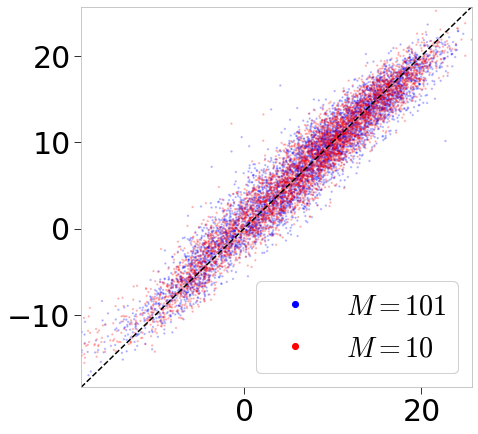

In [3]:
from utility.plotting.scatter_diff import *

d1 = "oldMode2017/results/ex_1_ann_feat/ann_pred.npz"
d2 = "oldMode2017/results/ex_1_ann_feat/ann_10_feat_pred.npz"

string_d = {
    "quantity": "Delay",
    "unit": "fs",
    "label_1": r"$M=101$",
    "label_2": r"$M=10$",
}

scatter_diff(d1, d2, string_d)

#### Results of Feature Selection

As we can see, the feature selection has significantly decreased the number of features used from >100 to 10, while leaving the prediction quality close to identical.

### Other Estimators

To benchmark our ANN, we also use linear models and gradient boosting estimators and perform the same analysis.

In [3]:
from utility.pipelines.gb import *
from utility.pipelines.lin import *

/home/karim/PycharmProjects/XFEL-ML/utility/plotting/plot_fit.py:5: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use("./utility/plotting/styling.mplstyle")
/home/karim/PycharmProjects/XFEL-ML/utility/plotting/plot_features.py:3: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use("./utility/plotting/styling.mplstyle")  # use styling file


            ebeamCharge  ebeamDumpCharge  ebeamEnergyBC1  ebeamEnergyBC2  \
train_mean     0.300175     1.062706e+09        0.007551       -0.032178   
train_std      0.003887     2.387308e+07        0.084573        0.248814   
test_mean      0.300176     1.062331e+09        0.009571       -0.035393   
test_std       0.003850     2.385365e+07        0.086477        0.253537   

            ebeamL3Energy  ebeamLTU250  ebeamLTU450  ebeamLTUAngX  \
train_mean    3485.310017    -0.130344     0.206999      0.068901   
train_std        6.198720     0.217400     0.224148      0.016434   
test_mean     3485.262521    -0.131970     0.208759      0.069143   
test_std         6.287720     0.220466     0.227424      0.016570   

            ebeamLTUAngY  ebeamLTUPosX  ...  LAS:FS1:VIT:PIEZO_AMP_MON  \
train_mean      0.016699     -0.263448  ...                   2.180796   
train_std       0.002914      0.028639  ...                   0.008180   
test_mean       0.016677     -0.262884  ...        

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


15.0


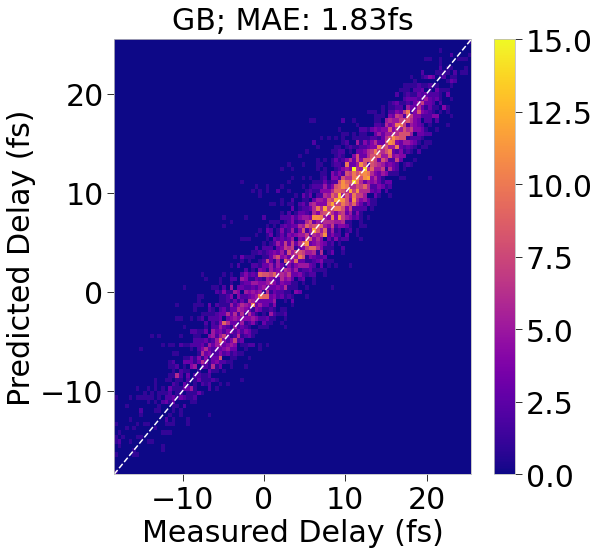

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=0.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=2)

<Figure size 432x288 with 0 Axes>

In [4]:
gb_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "PaperFigures/Figure Data/Figure 3/gb_delay.npz",
    "plot_fname": "doublePulse2017/results/ex_2_gb_perf/xgb_delays_hist2d",
}

gb_pipeline(data, gb_str_data)

            ebeamCharge  ebeamDumpCharge  ebeamEnergyBC1  ebeamEnergyBC2  \
train_mean     0.300175     1.062706e+09        0.007551       -0.032178   
train_std      0.003887     2.387308e+07        0.084573        0.248814   
test_mean      0.300176     1.062331e+09        0.009571       -0.035393   
test_std       0.003850     2.385365e+07        0.086477        0.253537   

            ebeamL3Energy  ebeamLTU250  ebeamLTU450  ebeamLTUAngX  \
train_mean    3485.310017    -0.130344     0.206999      0.068901   
train_std        6.198720     0.217400     0.224148      0.016434   
test_mean     3485.262521    -0.131970     0.208759      0.069143   
test_std         6.287720     0.220466     0.227424      0.016570   

            ebeamLTUAngY  ebeamLTUPosX  ...  LAS:FS1:VIT:PIEZO_AMP_MON  \
train_mean      0.016699     -0.263448  ...                   2.180796   
train_std       0.002914      0.028639  ...                   0.008180   
test_mean       0.016677     -0.262884  ...        

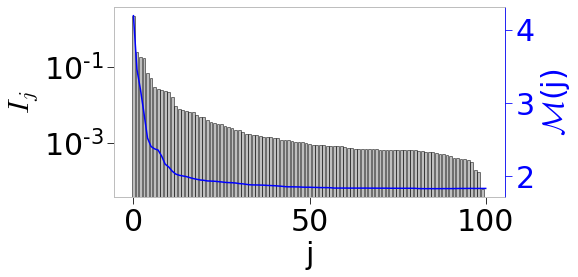

Index(['ebeamEnergyBC2', 'ebeamLTU450', 'ebeamDumpCharge', 'ebeamPkCurrBC1',
       'ebeamLTU250', 'AMO:R14:IOC:21:VHS7:CH0:CurrentMeasure',
       'AMO:LMP:VG:21:PRESS', 'ebeamXTCAVPhase', 'FBCK:FB04:LG01:DL2VERNIER',
       'ebeamL3Energy'],
      dtype='object')
            ebeamEnergyBC2  ebeamLTU450  ebeamDumpCharge  ebeamPkCurrBC1  \
train_mean       -0.032178     0.206999     1.062706e+09      119.669862   
train_std         0.248814     0.224148     2.387308e+07        5.166623   
test_mean        -0.035393     0.208759     1.062331e+09      119.608020   
test_std          0.253537     0.227424     2.385365e+07        5.160910   

            ebeamLTU250  AMO:R14:IOC:21:VHS7:CH0:CurrentMeasure  \
train_mean    -0.130344                            2.525509e-04   
train_std      0.217400                            6.205297e-08   
test_mean     -0.131970                            2.525516e-04   
test_std       0.220466                            7.948282e-08   

            AMO:L

<Figure size 432x288 with 0 Axes>

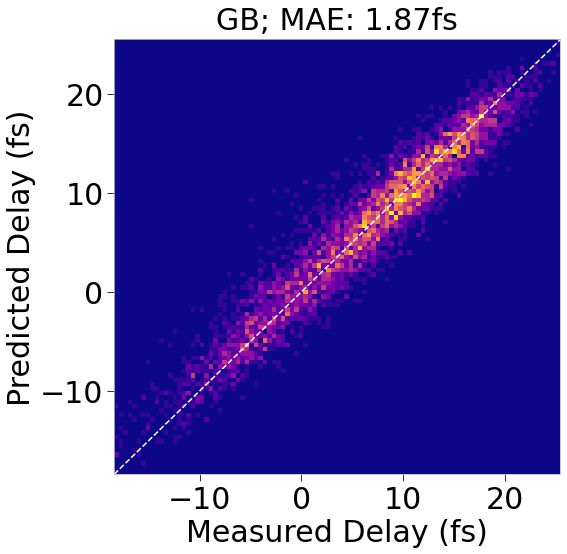

(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=0.0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2),
 Index(['ebeamEnergyBC2', 'ebeamLTU450', 'ebeamDumpCharge', 'ebeamPkCurrBC1',
        'ebeamLTU250', 'AMO:R14:IOC:21:VHS7:CH0:CurrentMeasure',
        'AMO:LMP:VG:21:PRESS', 'ebeamXTCAVPhase', 'FBCK:FB04:LG01:DL2VERNIER',
        'ebeamL3Energy'],
       dtype='object'))

<Figure size 432x288 with 0 Axes>

In [5]:
gb_feat_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "PaperFigures/Figure Data/Figure 3/gb_delay.npz",
    "plot_fname": "doublePulse2017/results/ex_2_gb_perf/xgb_low_delays_hist2d",
}

gb_feature_pipeline(data, gb_feat_str_data)

            ebeamCharge  ebeamDumpCharge  ebeamEnergyBC1  ebeamEnergyBC2  \
train_mean     0.300175     1.062706e+09        0.007551       -0.032178   
train_std      0.003887     2.387308e+07        0.084573        0.248814   
test_mean      0.300176     1.062331e+09        0.009571       -0.035393   
test_std       0.003850     2.385365e+07        0.086477        0.253537   

            ebeamL3Energy  ebeamLTU250  ebeamLTU450  ebeamLTUAngX  \
train_mean    3485.310017    -0.130344     0.206999      0.068901   
train_std        6.198720     0.217400     0.224148      0.016434   
test_mean     3485.262521    -0.131970     0.208759      0.069143   
test_std         6.287720     0.220466     0.227424      0.016570   

            ebeamLTUAngY  ebeamLTUPosX  ...  LAS:FS1:VIT:PIEZO_AMP_MON  \
train_mean      0.016699     -0.263448  ...                   2.180796   
train_std       0.002914      0.028639  ...                   0.008180   
test_mean       0.016677     -0.262884  ...        

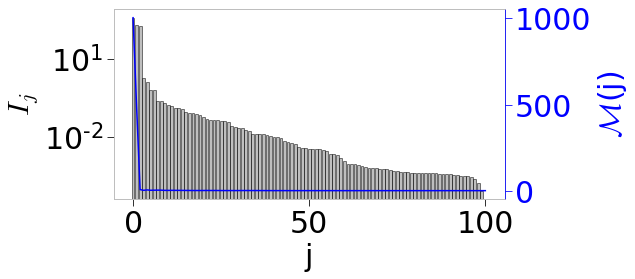

Index(['ebeamL3Energy', 'ebeamLTU250', 'ebeamLTU450', 'ebeamEnergyBC2',
       'HVCH:FEE1:242:VoltageMeasure', 'HVCH:FEE1:361:VoltageMeasure',
       'HVCH:FEE1:241:VoltageMeasure',
       'AMO:R14:IOC:21:VHS8:CH2:VoltageMeasure',
       'AMO:R14:IOC:21:VHS8:CH2:CurrentMeasure', 'ebeamDumpCharge'],
      dtype='object')
14.0


<Figure size 432x288 with 0 Axes>

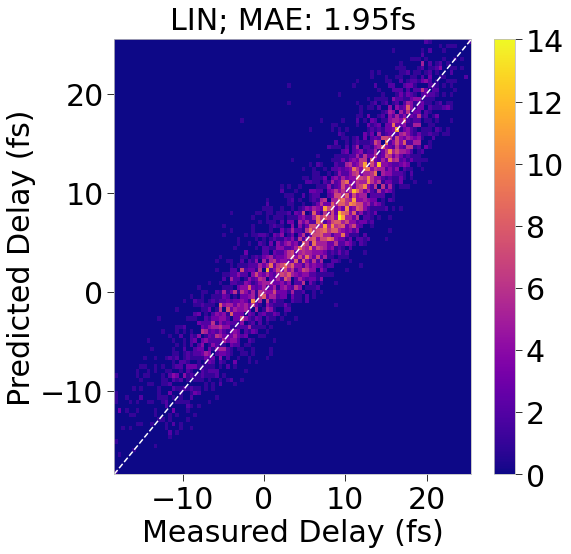

(LinearRegression(),
 Index(['ebeamL3Energy', 'ebeamLTU250', 'ebeamLTU450', 'ebeamEnergyBC2',
        'HVCH:FEE1:242:VoltageMeasure', 'HVCH:FEE1:361:VoltageMeasure',
        'HVCH:FEE1:241:VoltageMeasure',
        'AMO:R14:IOC:21:VHS8:CH2:VoltageMeasure',
        'AMO:R14:IOC:21:VHS8:CH2:CurrentMeasure', 'ebeamDumpCharge'],
       dtype='object'))

<Figure size 432x288 with 0 Axes>

In [6]:
lin_str_data = {
    "feat_name": "Delays",
    "plot_lab": "Delay",
    "unit": "fs",
    "data_fname": "PaperFigures/Figure Data/Figure 3/lin_delay.npz",
    "plot_fname": "doublePulse2017/results/ex_2_gb_perf/lin_low_delays_hist2d",
}

lin_feature_pipeline(data, lin_str_data)